In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import glob
import os
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import scipy.stats as st
import statsmodels.tsa.api as tsa
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("/content/drive/MyDrive/projects/Store_Sales-Time_Series_Forecasting/")
csv_list = glob.glob('store-sales-time-series-forecasting/*.csv')

for _csv in csv_list:
  df = pd.read_csv(_csv, index_col=0)
  print(_csv)
  print(df.isnull().sum().sum())

store-sales-time-series-forecasting/oil.csv
43
store-sales-time-series-forecasting/test.csv
0
store-sales-time-series-forecasting/holidays_events.csv
0
store-sales-time-series-forecasting/sample_submission.csv
0
store-sales-time-series-forecasting/stores.csv
0
store-sales-time-series-forecasting/train.csv
0
store-sales-time-series-forecasting/transactions.csv
0


In [3]:
df_train = pd.read_csv("store-sales-time-series-forecasting/train.csv", index_col=1, parse_dates=True)
print(df_train.columns)

Index(['id', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')


In [15]:
df_train.head()

id  store_nbr      family  sales  onpromotion
date                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0
2013-01-01   1          1   BABY CARE    0.0            0
2013-01-01   2          1      BEAUTY    0.0            0
2013-01-01   3          1   BEVERAGES    0.0            0
2013-01-01   4          1       BOOKS    0.0            0

In [16]:
df_train["family"].unique(), df_train["family"].nunique()

(array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
        'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
        'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
        'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
        'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
        'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
        'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
        'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
        'SEAFOOD'], dtype=object), 33)

売り上げ予測0円で良さそうなもの

In [17]:
c = df_train.groupby(["store_nbr", "family"]).sales.sum().reset_index().sort_values(["family","store_nbr"]).query(" sales==0 ")
print(len(c))
c

53


store_nbr           family  sales
1             1        BABY CARE    0.0
397          13        BABY CARE    0.0
727          23        BABY CARE    0.0
1420         44        BABY CARE    0.0
1453         45        BABY CARE    0.0
1486         46        BABY CARE    0.0
1519         47        BABY CARE    0.0
1552         48        BABY CARE    0.0
1585         49        BABY CARE    0.0
1618         50        BABY CARE    0.0
1651         51        BABY CARE    0.0
1684         52        BABY CARE    0.0
268           9            BOOKS    0.0
301          10            BOOKS    0.0
334          11            BOOKS    0.0
367          12            BOOKS    0.0
400          13            BOOKS    0.0
433          14            BOOKS    0.0
466          15            BOOKS    0.0
499          16            BOOKS    0.0
532          17            BOOKS    0.0
565          18            BOOKS    0.0
598          19            BOOKS    0.0
631          20            BOOKS    0.0
664          21            BOOKS    0.0
697          22            BOOKS    0.0
895          28            BOOKS    0.0
928          29            BOOKS    0.0
961          30            BOOKS    0.0
994          31            BOOKS    0.0
1027         32            BOOKS    0.0
1060         33            BOOKS    0.0
1093         34            BOOKS    0.0
1126         35            BOOKS    0.0
1159         36            BOOKS    0.0
1258         39            BOOKS    0.0
1291         40            BOOKS    0.0
1390         43            BOOKS    0.0
1687         52            BOOKS    0.0
1753         54            BOOKS    0.0
514          16       LADIESWEAR    0.0
811          25       LADIESWEAR    0.0
910          28       LADIESWEAR    0.0
943          29       LADIESWEAR    0.0
1042         32       LADIESWEAR    0.0
1075         33       LADIESWEAR    0.0
1141         35       LADIESWEAR    0.0
1306         40       LADIESWEAR    0.0
1405         43       LADIESWEAR    0.0
1768         54       LADIESWEAR    0.0
449          14  LAWN AND GARDEN    0.0
977          30  LAWN AND GARDEN    0.0
1769         54  LAWN AND GARDEN    0.0

販売開始時期
- store52が一番オープン遅くて2017年4月20日にオープンした

In [29]:
a = df_train.groupby(["date","store_nbr"]).sum().reset_index()
a[a["sales"] > 0].groupby(["store_nbr"]).min().sort_values(["date"], ascending=False).head()

date        id      sales  onpromotion
store_nbr                                             
52        2017-04-20  92141907  14408.151            0
22        2015-10-09  59351028   2848.208            0
42        2015-08-21  56493492   6130.567            0
21        2015-07-24  54821877   5920.088            0
29        2015-03-20  47421033   3930.046            7

In [ ]:
family_list = np.sort(df_train["family"].unique())
nbr_list = np.sort(df_train["store_nbr"].unique())

In [ ]:
for family in family_list:
  a = df_train.query(" family==@family ")[["store_nbr", "sales"]]
  a["ind"] = 1
  a["ind"] = a.groupby("store_nbr").ind.cumsum().values
  a = pd.pivot(a, index = "ind", columns = "store_nbr", values = "sales").corr()
  mask = np.triu(a.corr())
  plt.figure(figsize=(20, 20), dpi=180)
  sns.heatmap(a,
          annot=True,
          fmt='.1f',
          cmap='coolwarm',
          square=True,
          mask=mask,
          linewidths=1,
          cbar=False)
  plt.title(f"{family} Correlations", fontsize = 20)
  plt.show()
plt.close()

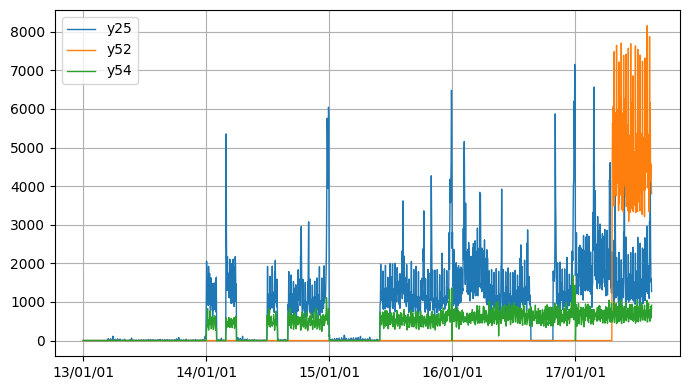

In [ ]:
fig = plt.figure(figsize=(7, 4), dpi=100)
data = df_train.query(" family=='PRODUCE' ")
x = data.query(" store_nbr==52 ").index
y25 = data.query(" store_nbr==25 ").sales.to_numpy()
y52 = data.query(" store_nbr==52 ").sales.to_numpy()
y54 = data.query(" store_nbr==54 ").sales.to_numpy()
ax = fig.add_subplot(111)
ax.plot(x, y25, linewidth=1.0, label="y25")
ax.plot(x, y52, linewidth=1.0, label="y52")
ax.plot(x, y54, linewidth=1.0, label="y54")
ax.xaxis.set_major_formatter(DateFormatter("%y/%m/%d"))
fig.tight_layout()
plt.grid()
plt.legend()
plt.show()
plt.close()

In [ ]:
# 各日にちのfamilyごとの売り上げ()
df_train_g = df_train.groupby(["date", "family"]).sum()
px.line(df_train_g, x=df_train_g.index.get_level_values("date"), y="sales", color=df_train_g.index.get_level_values("family"), title="sales" )

In [ ]:
family = "BEVERAGES"
df_train_g = df_train.query(" family==@family ").groupby(["date", "store_nbr"]).sum()
px.line(df_train_g, x=df_train_g.index.get_level_values("date"), y="sales", color=df_train_g.index.get_level_values("store_nbr"), title="sales" )

In [ ]:
df_stores = pd.read_csv("store-sales-time-series-forecasting/stores.csv")
print(len(df_stores))
df_stores.head()

54


store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [ ]:
df_oil = pd.read_csv("store-sales-time-series-forecasting/oil.csv", index_col=0, parse_dates=True)
#df_oil = df_oil.asfreq("D").fillna(0)
df_oil = df_oil.asfreq("D")
df_oil.head()

dcoilwtico
date                  
2013-01-01         NaN
2013-01-02       93.14
2013-01-03       92.97
2013-01-04       93.12
2013-01-05         NaN

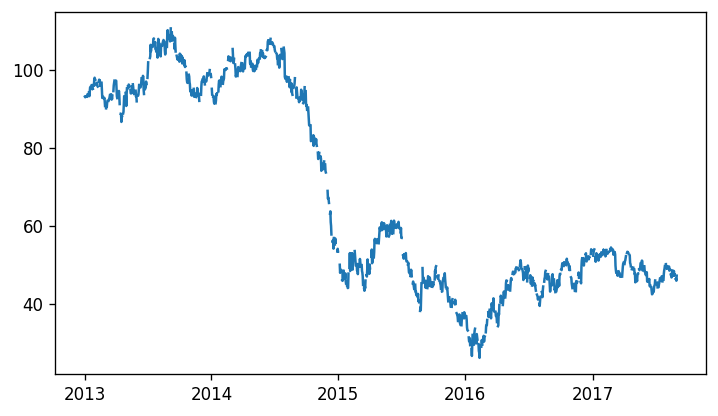

In [ ]:
fig = plt.figure(figsize=(7, 4), dpi=120)
ax = fig.add_subplot(111)
x = df_oil.index
y = df_oil["dcoilwtico"].to_numpy()
ax.plot(x, y)
plt.show()
plt.close()

給料日(15日と月末)に売り上げが上がるか
- personal care、cleaningは日の影響を受けれるかなあ

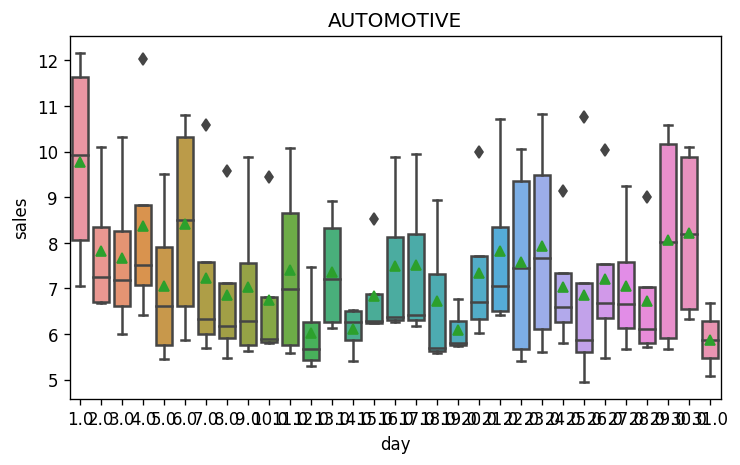

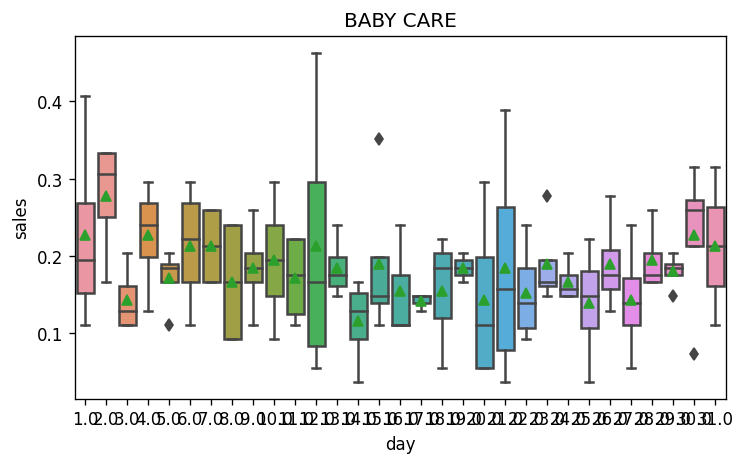

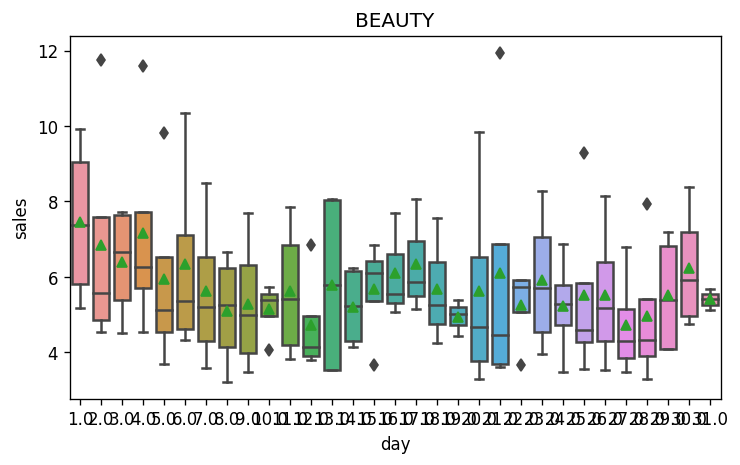

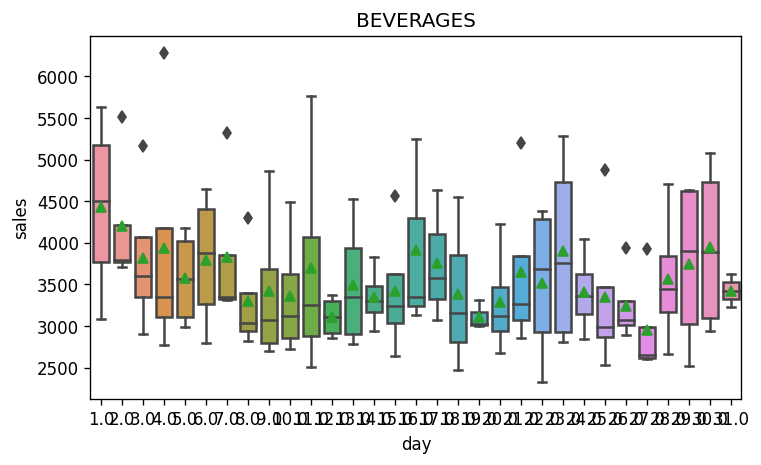

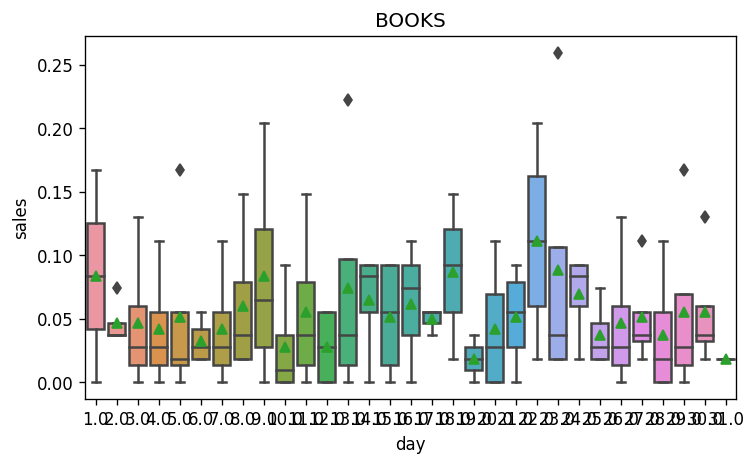

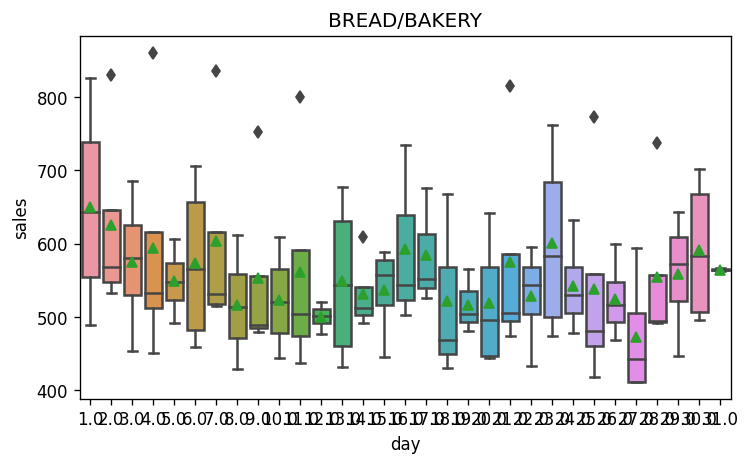

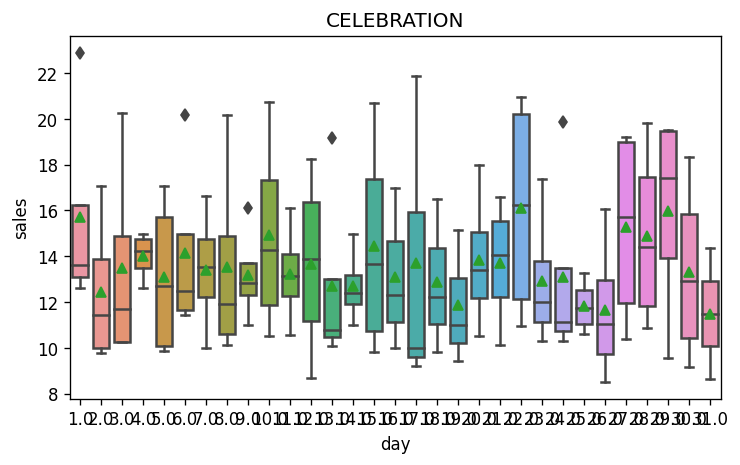

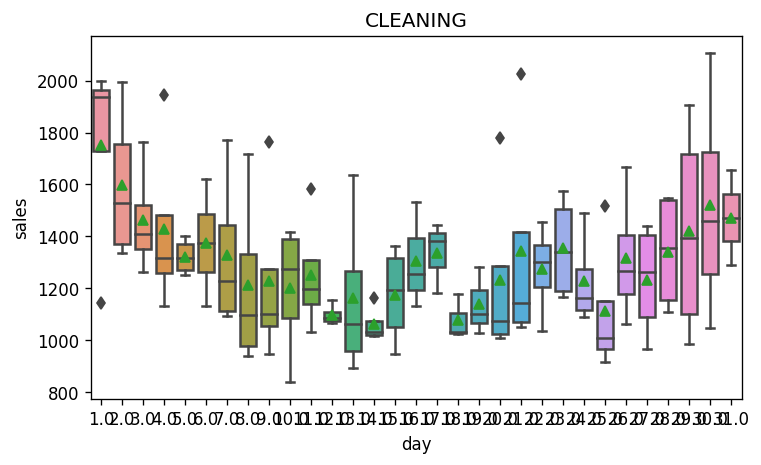

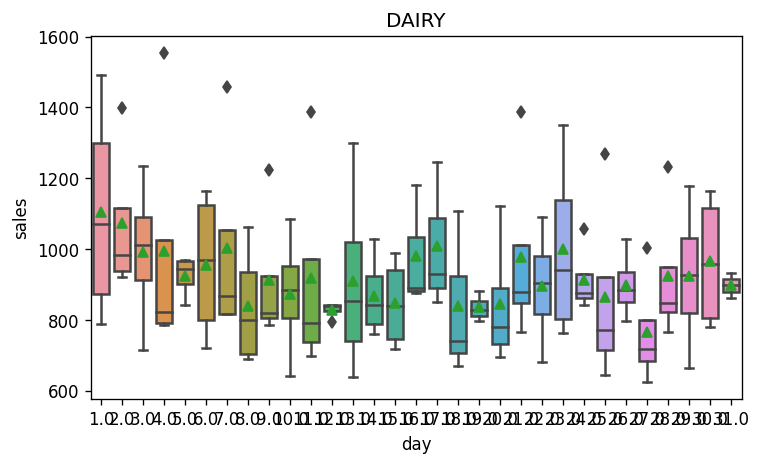

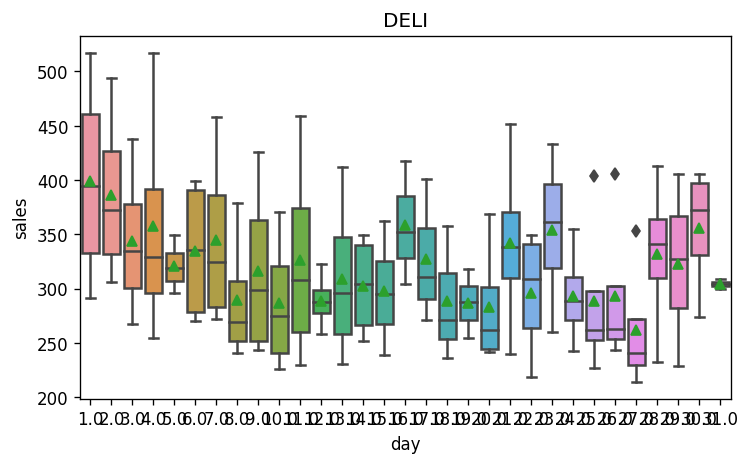

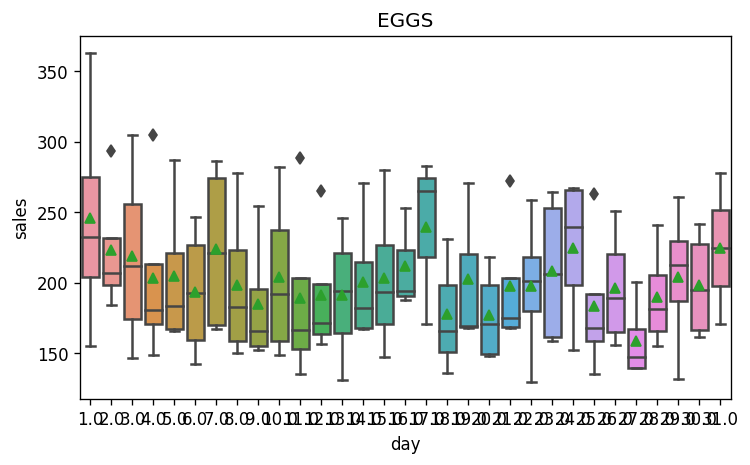

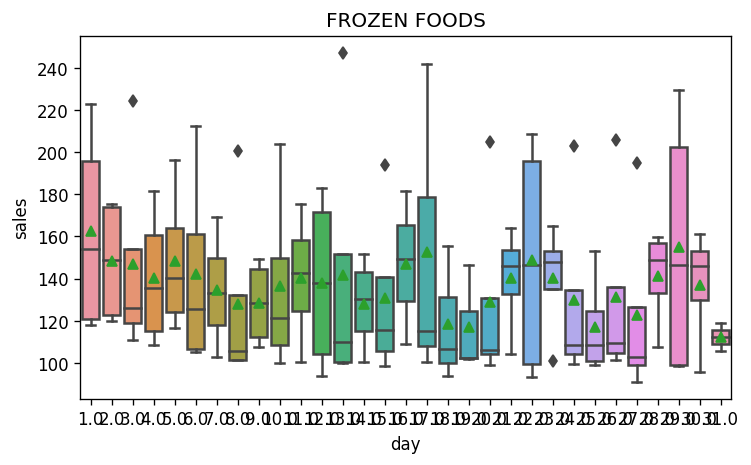

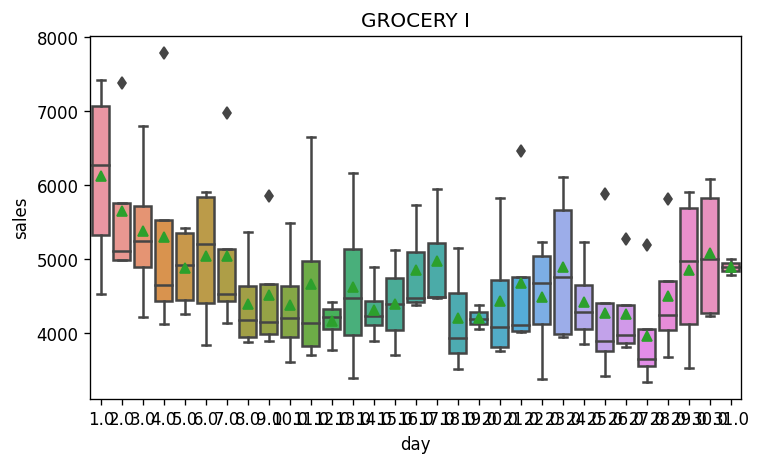

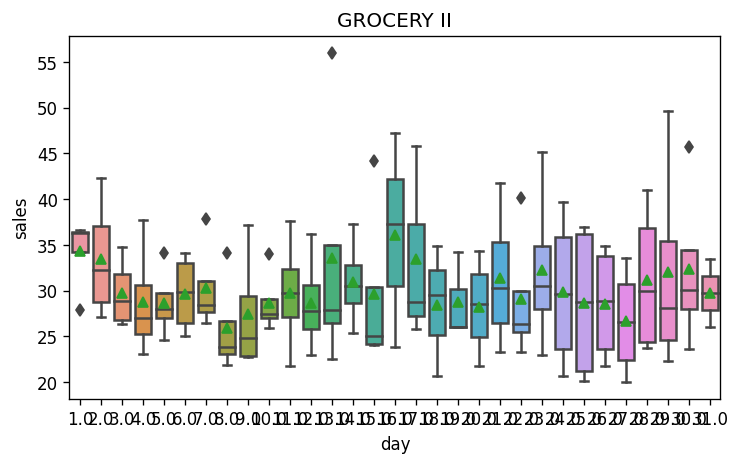

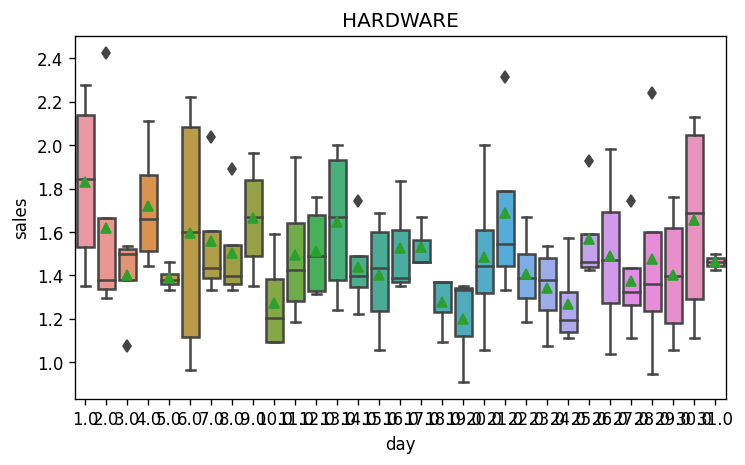

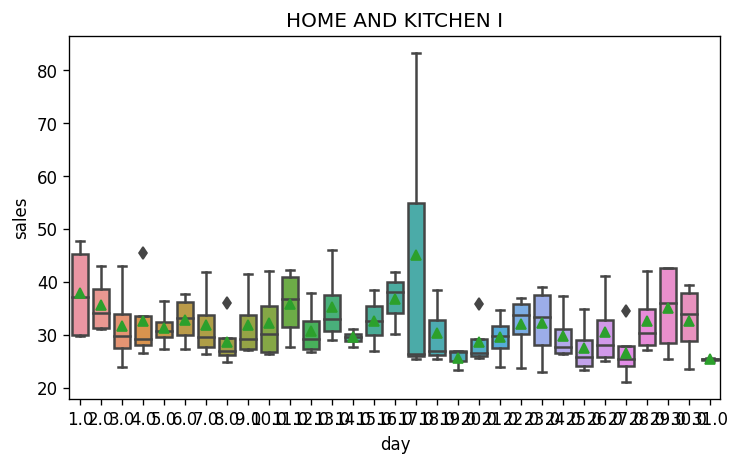

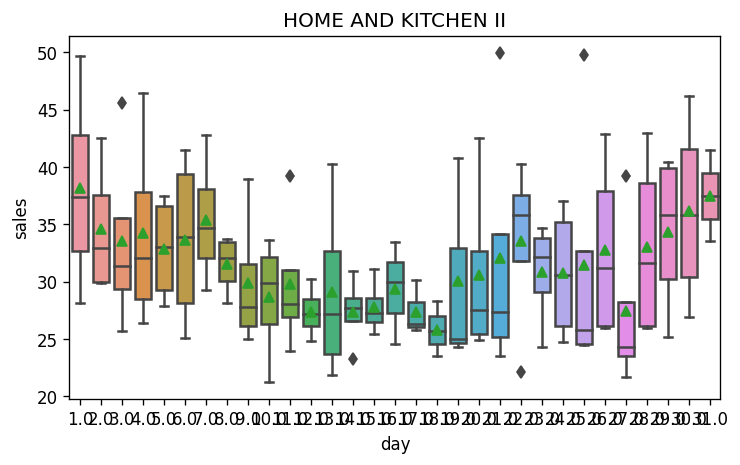

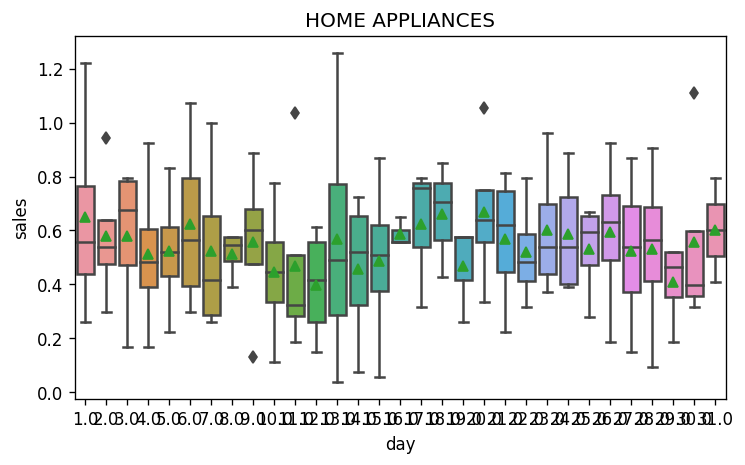

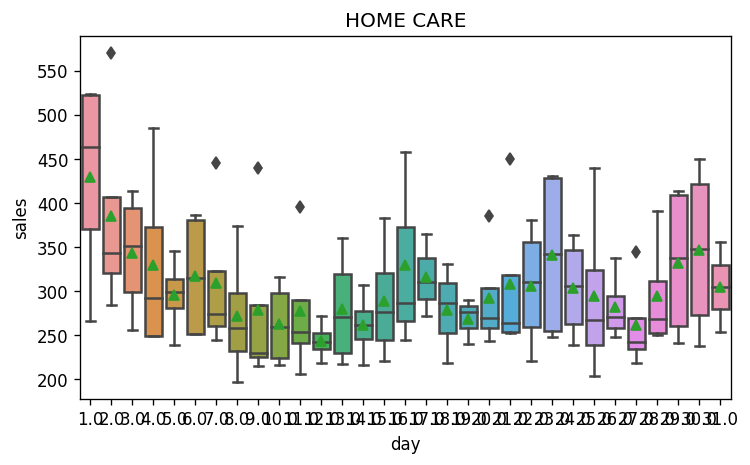

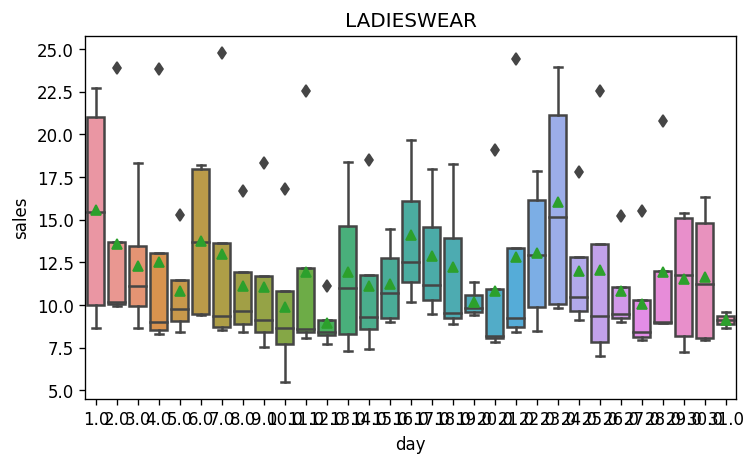

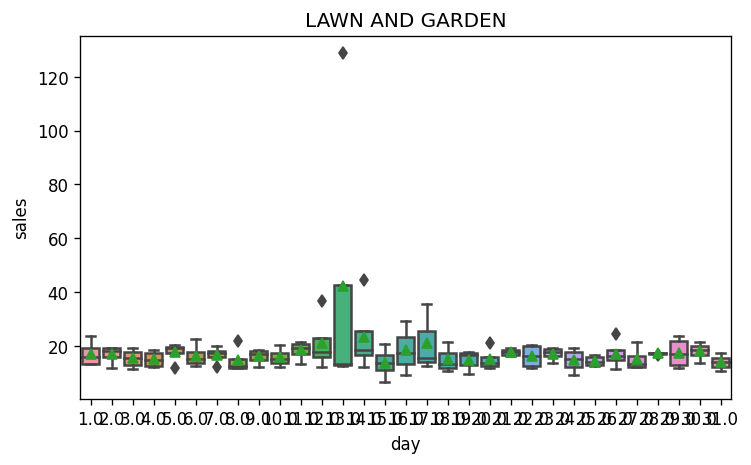

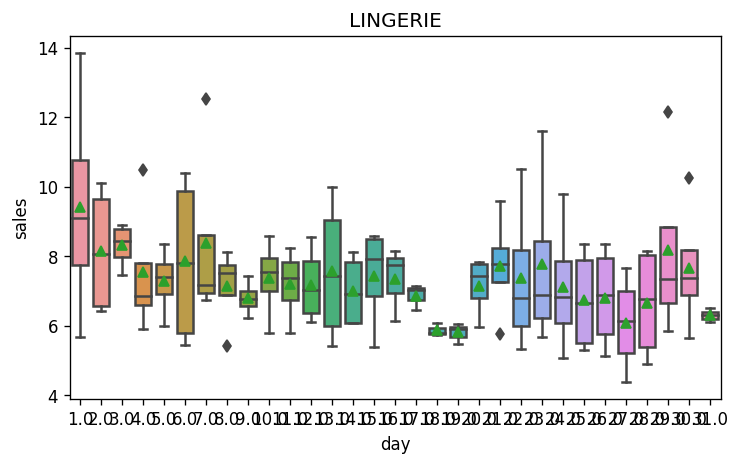

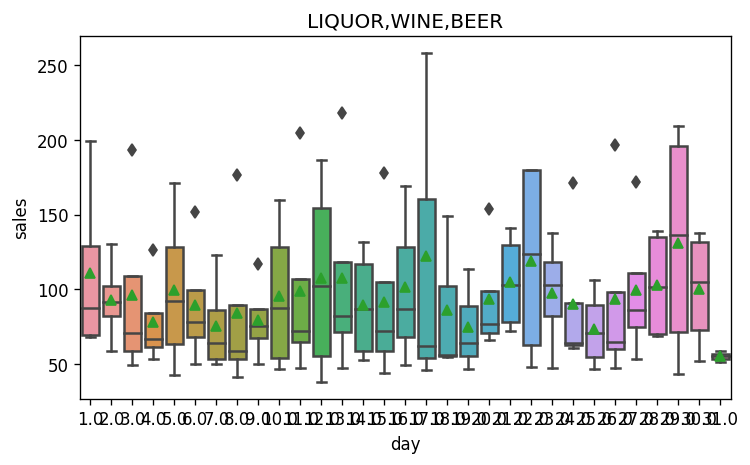

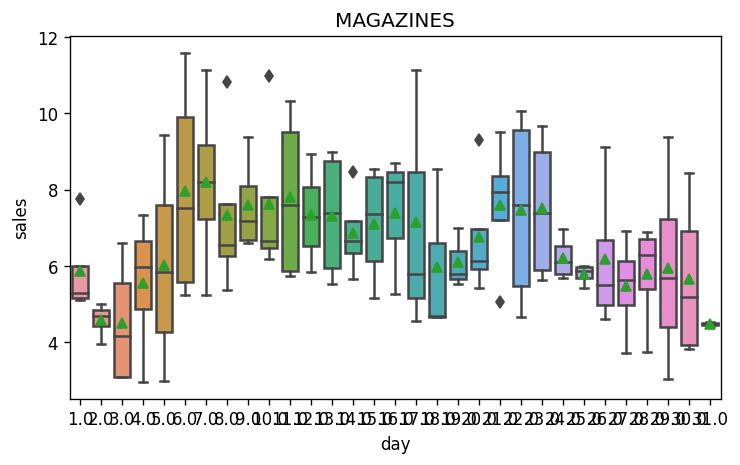

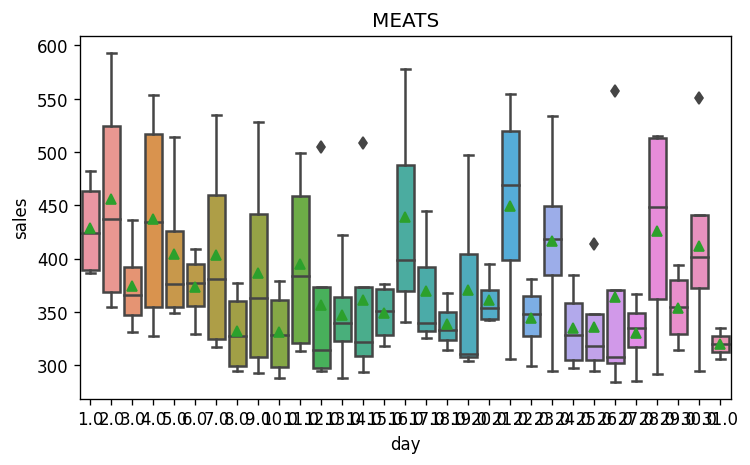

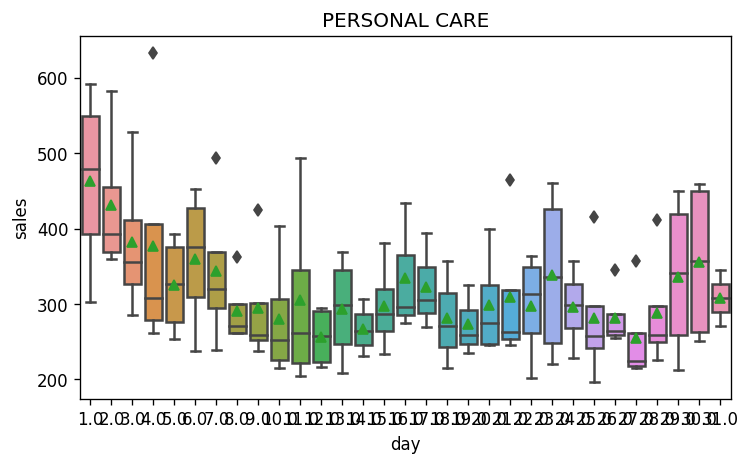

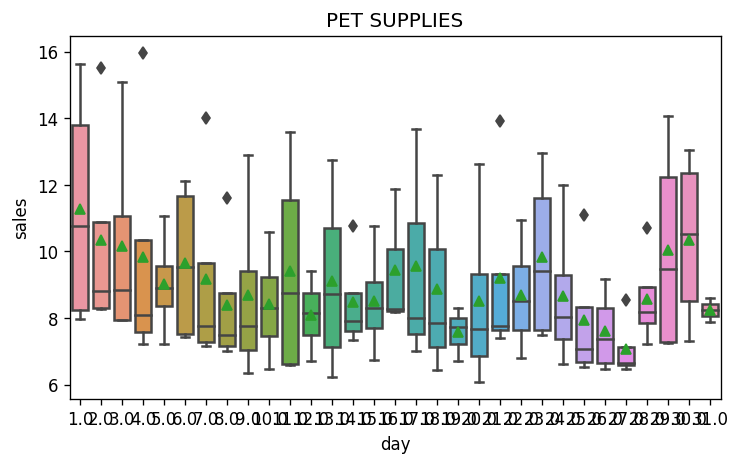

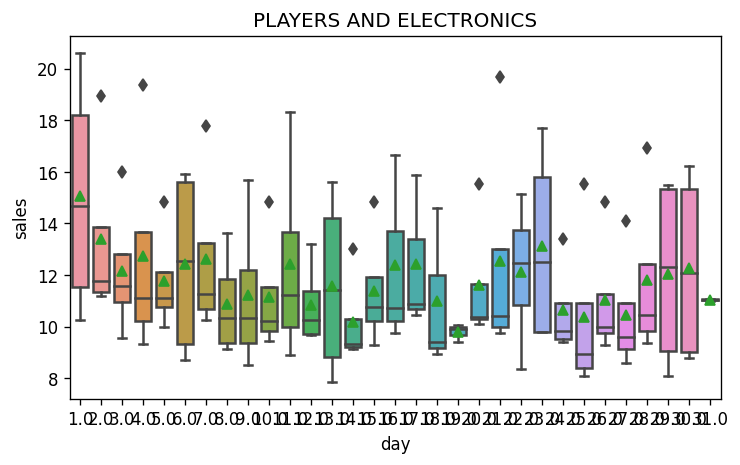

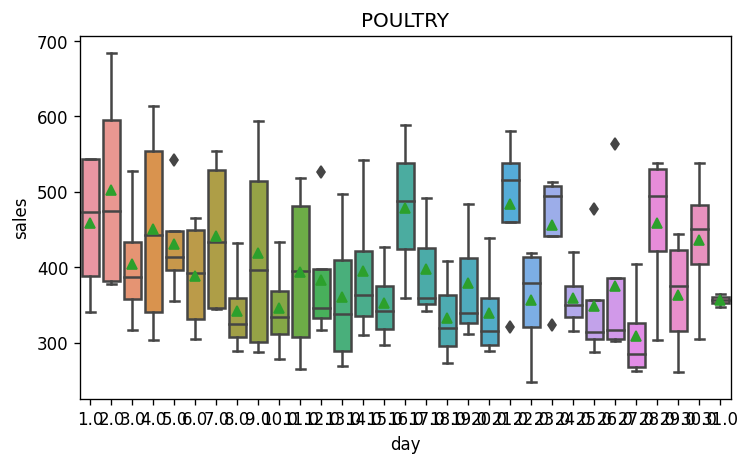

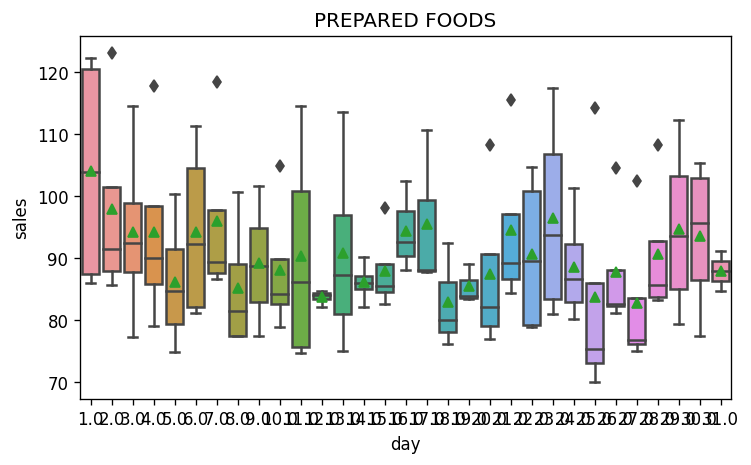

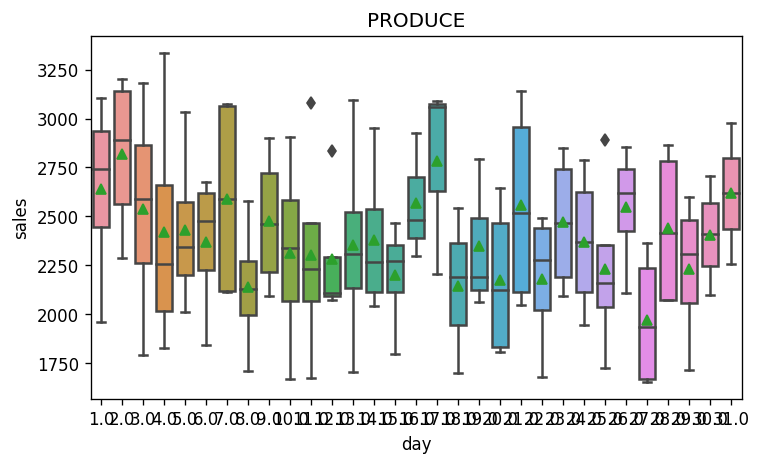

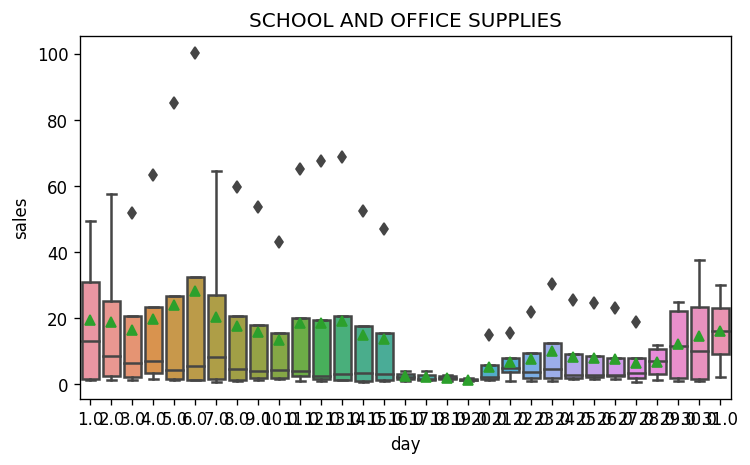

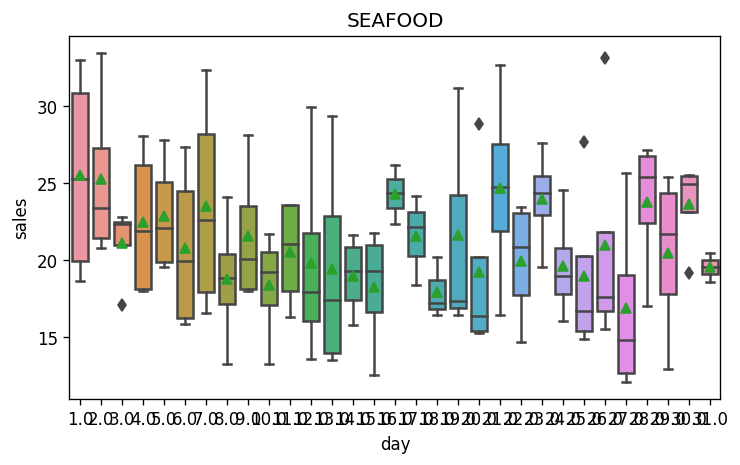

In [4]:
for family in df_train["family"].unique():
  data = df_train.loc["2017-04-20":].query(" family==@family ")
  data["day"] = data.index.day
  data = data.groupby(["date"]).mean()
  plt.figure(figsize=(7, 4), dpi=120)
  sns.boxplot(data=data, x="day", y="sales", showmeans=True).set(title=family)
  plt.show()

曜日
- 大体土日は売り上げ上がりそう

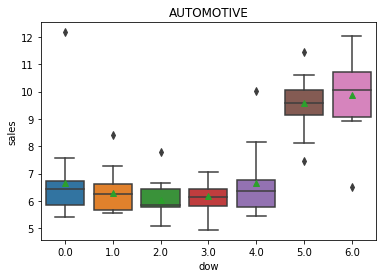

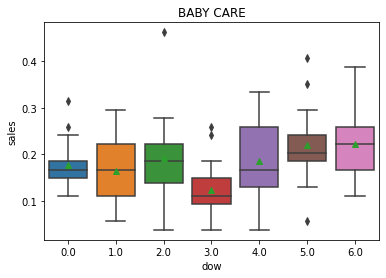

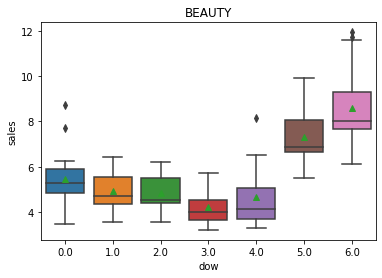

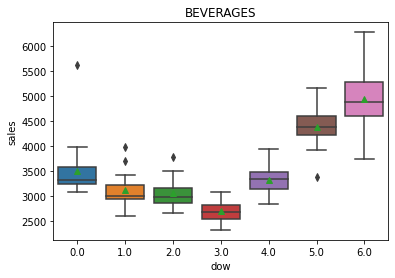

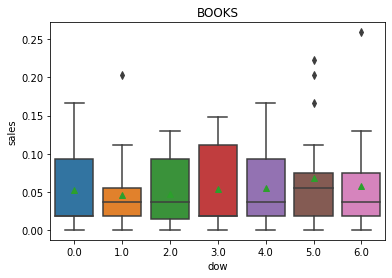

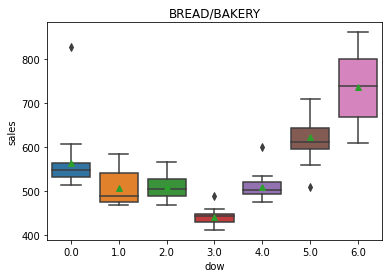

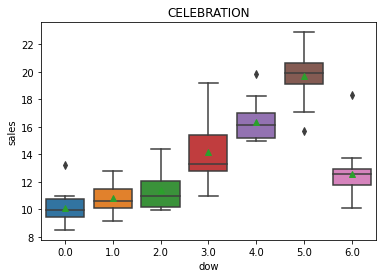

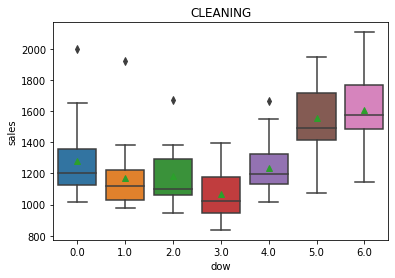

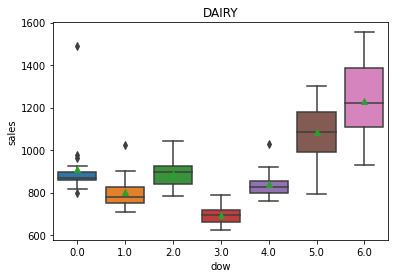

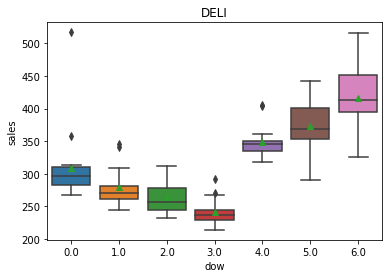

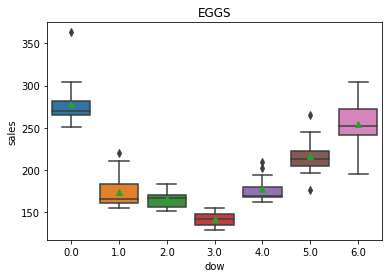

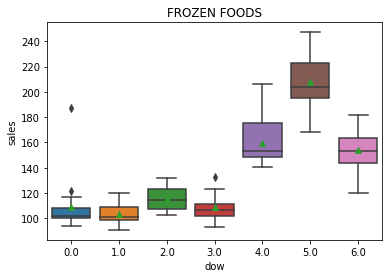

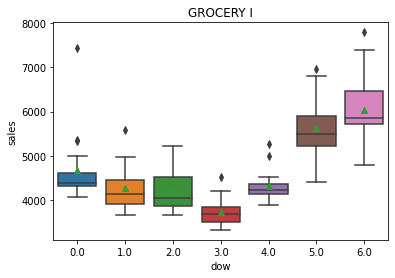

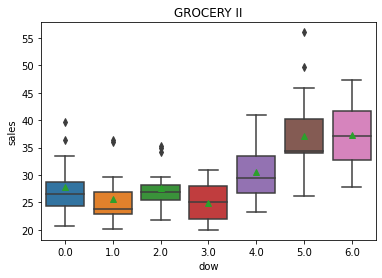

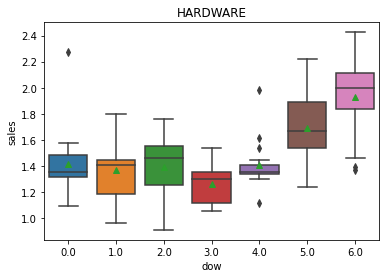

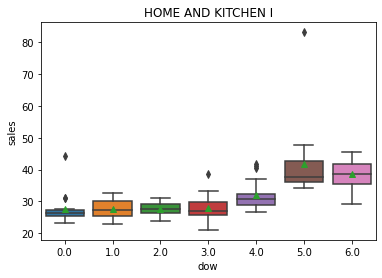

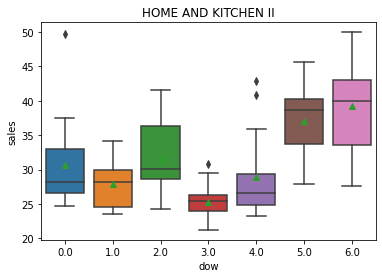

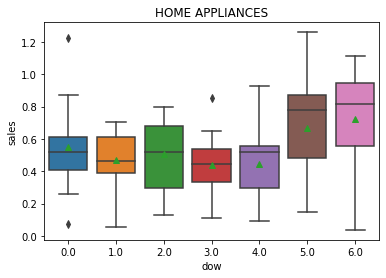

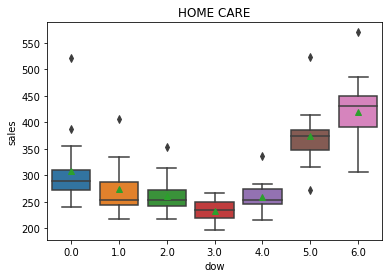

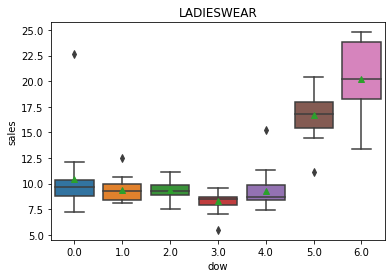

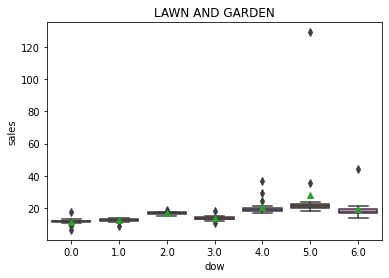

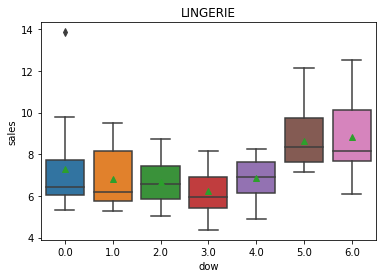

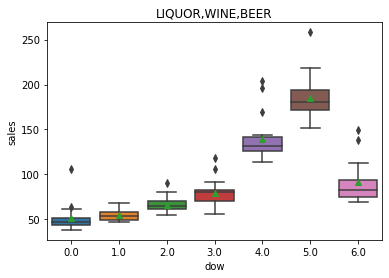

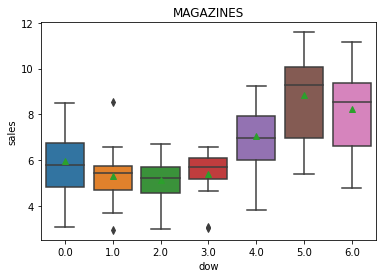

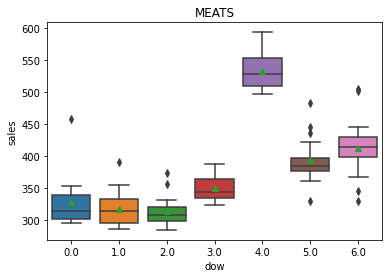

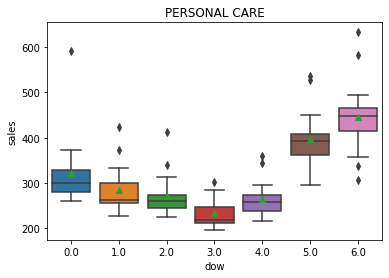

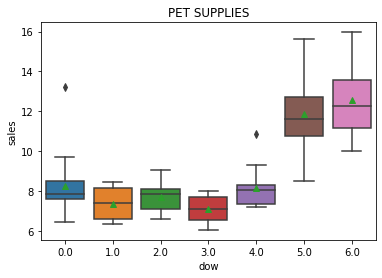

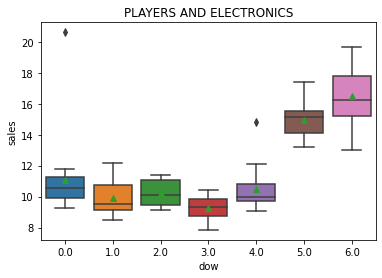

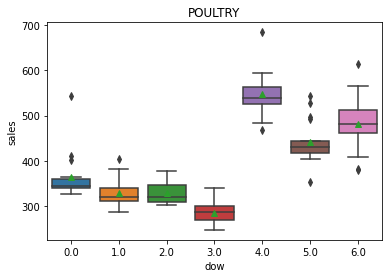

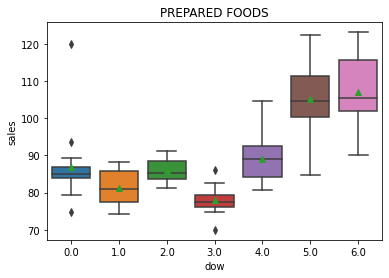

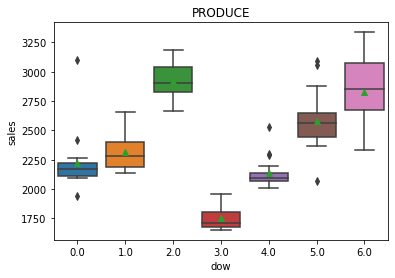

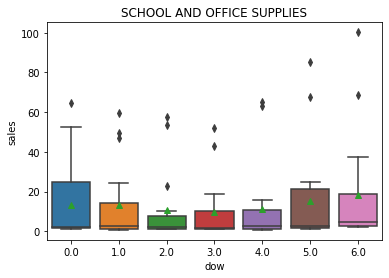

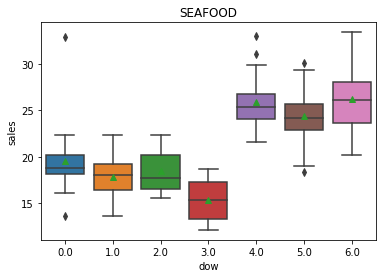

In [5]:
for family in df_train["family"].unique():
  data = df_train.loc["2017-04-20":].query(" family==@family ")
  data["dow"] = data.index.dayofweek
  data = data.groupby(["date"]).mean()
  #plt.figure(figsize=(7, 4), dpi=120)
  sns.boxplot(data=data, x="dow", y="sales", showmeans=True).set(title=family)
  plt.show()

月
- 12月にブーストかかってる

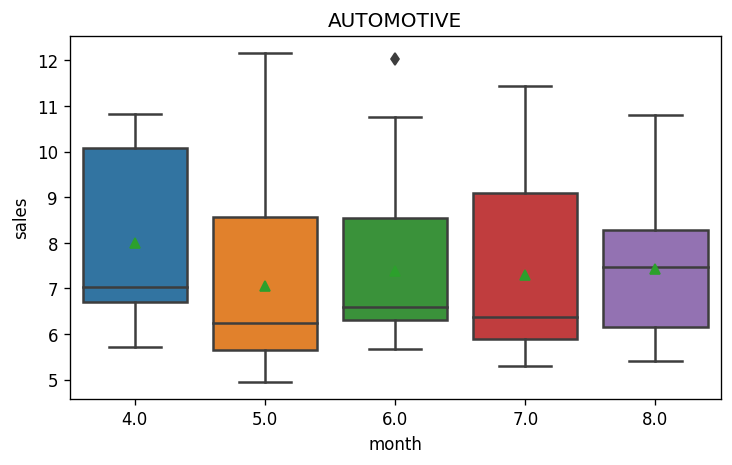

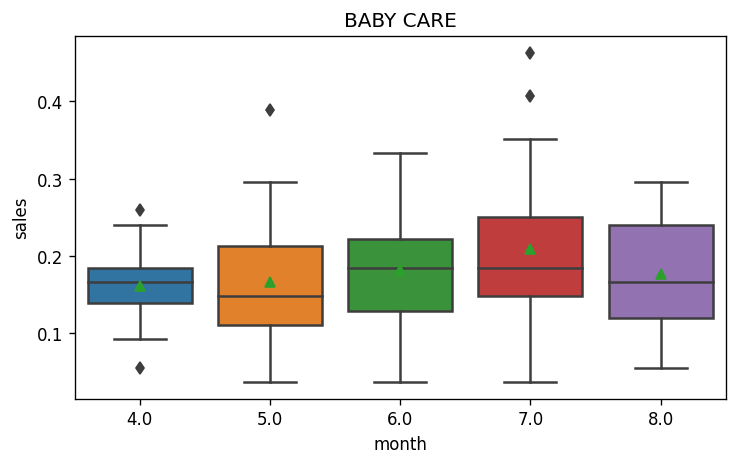

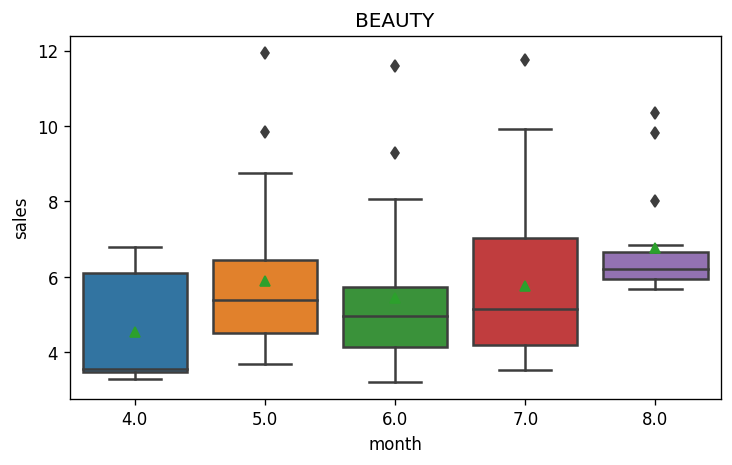

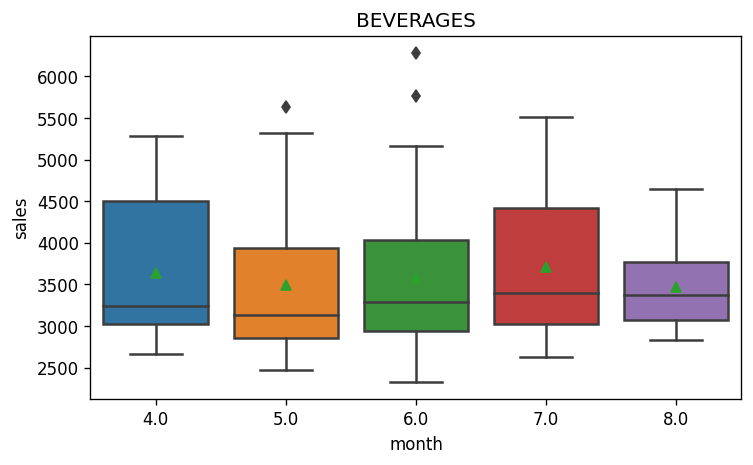

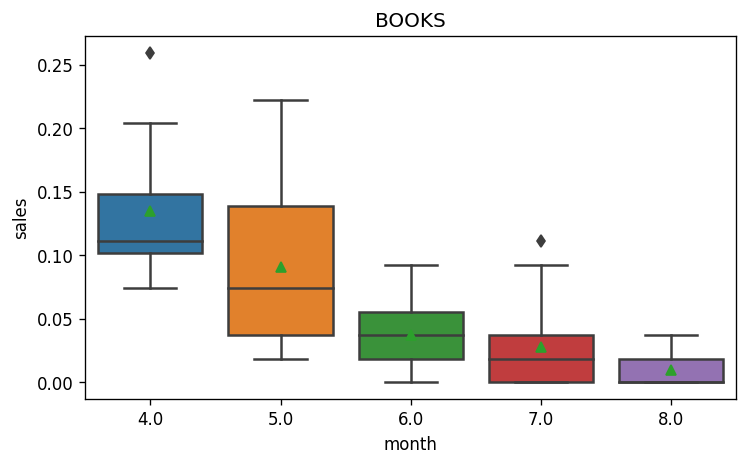

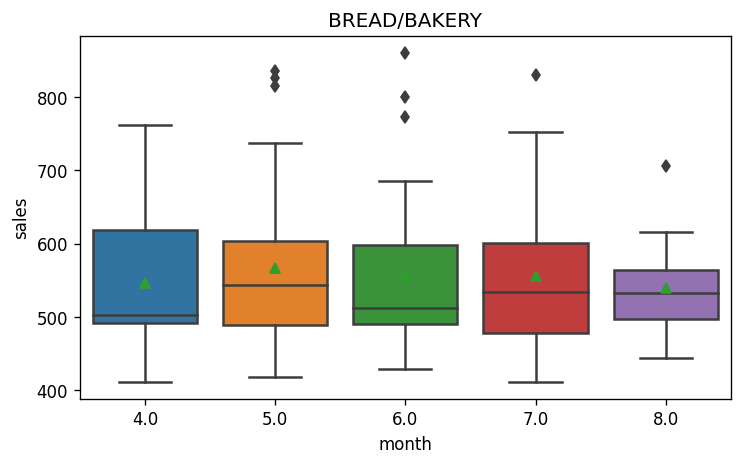

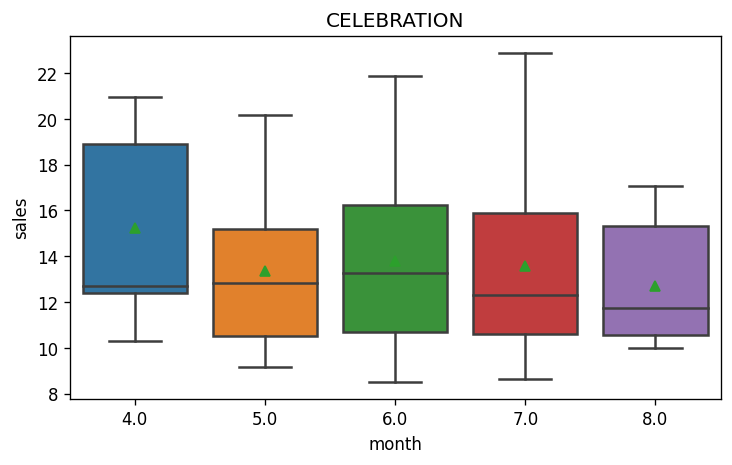

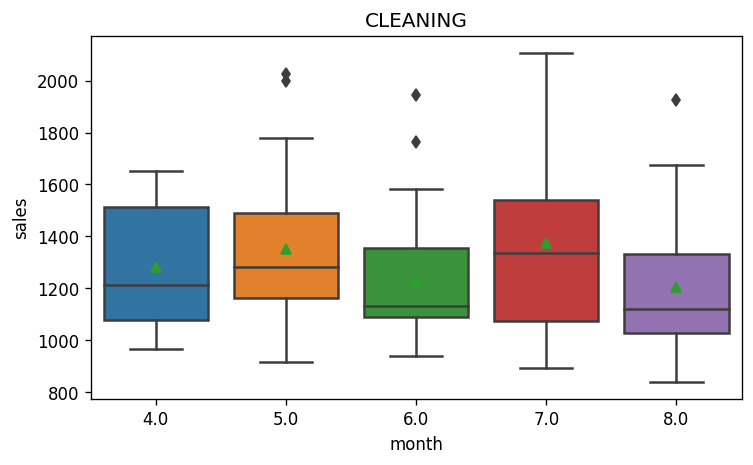

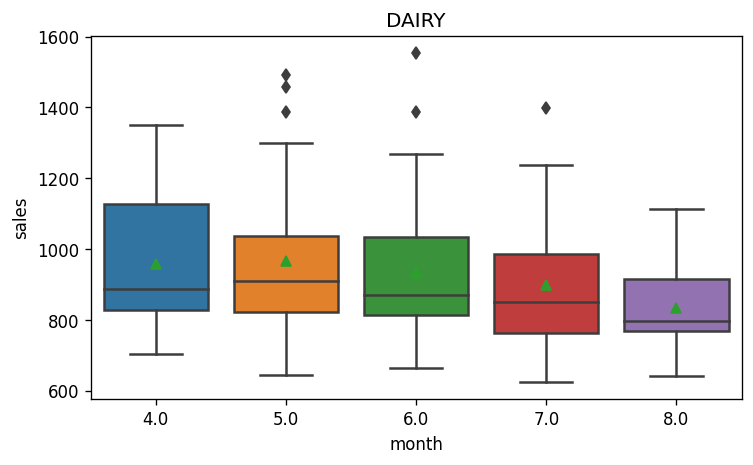

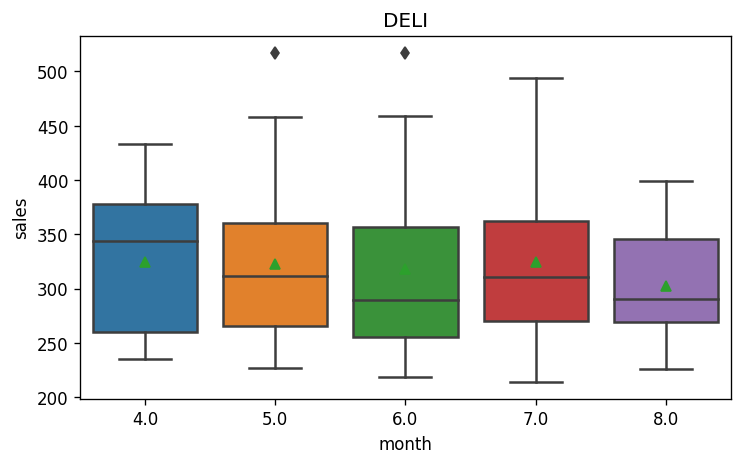

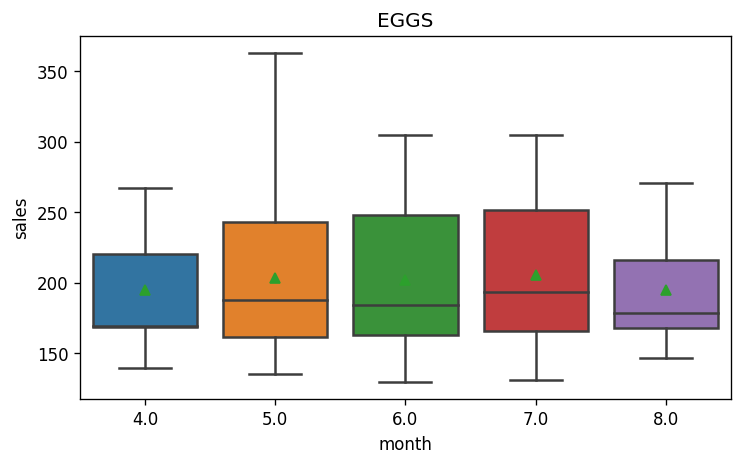

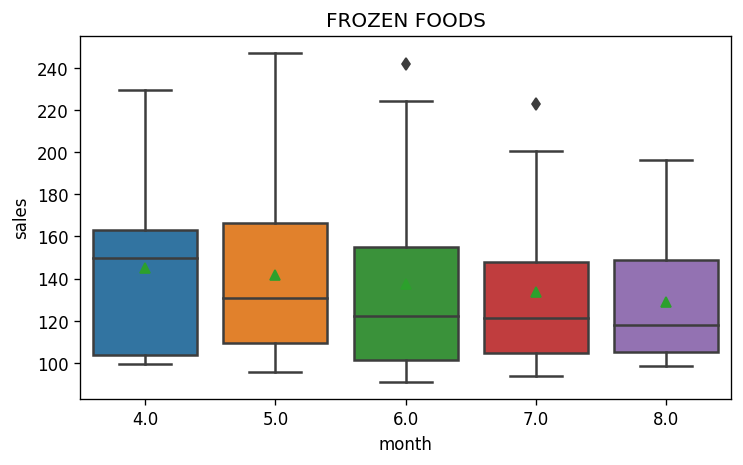

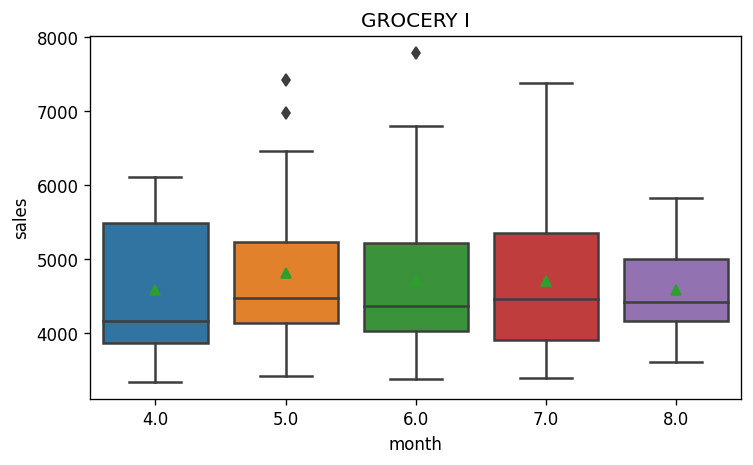

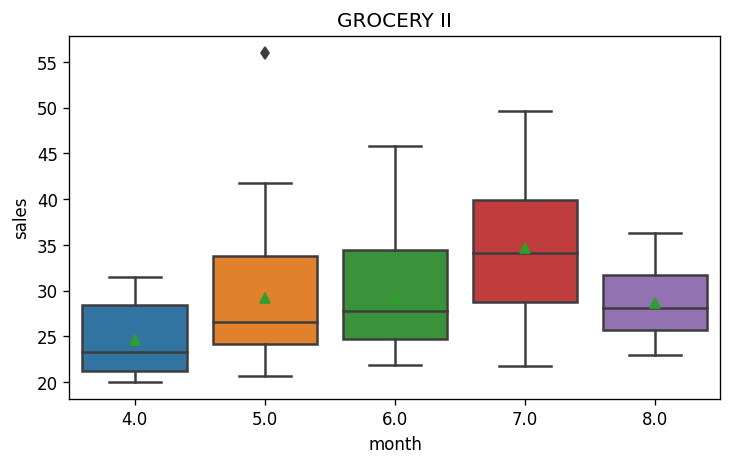

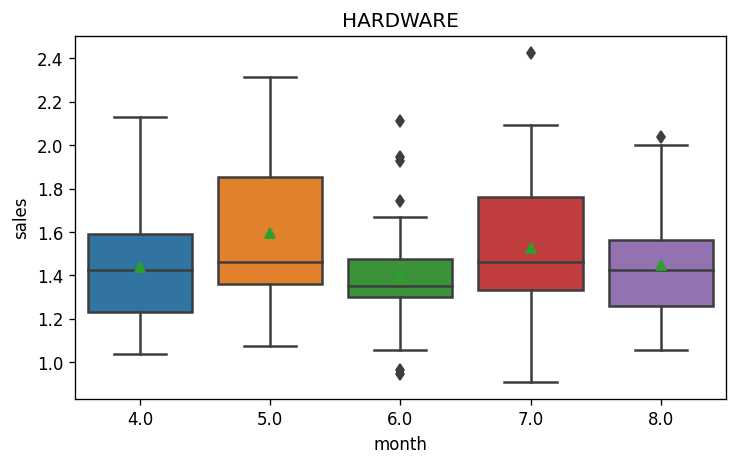

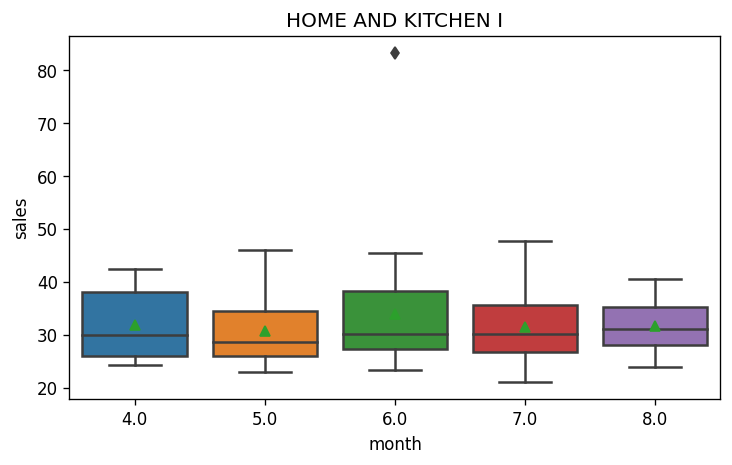

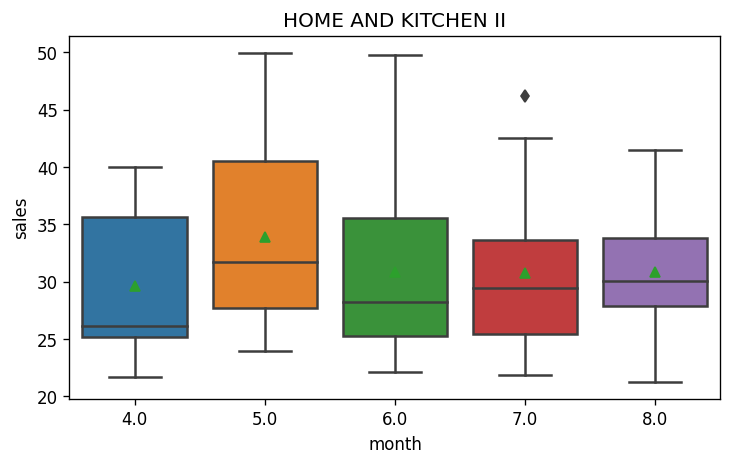

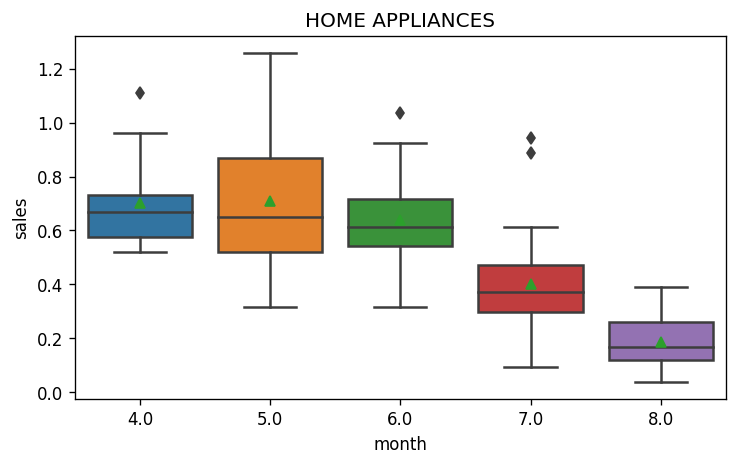

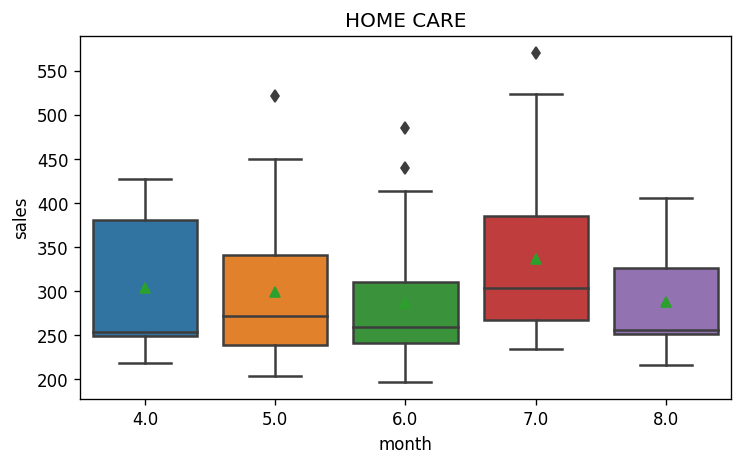

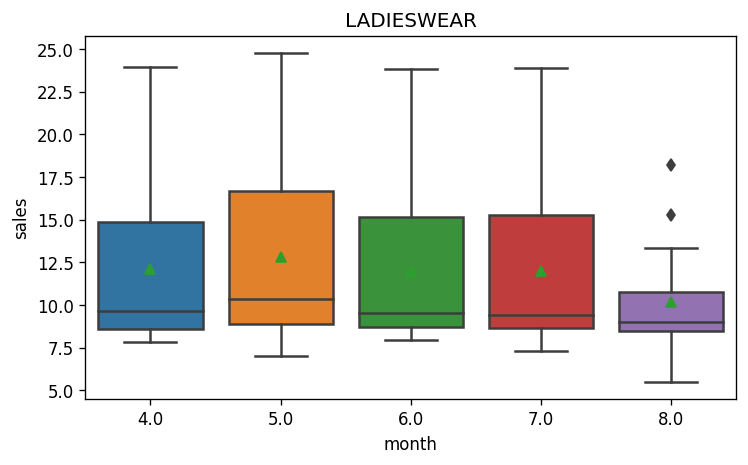

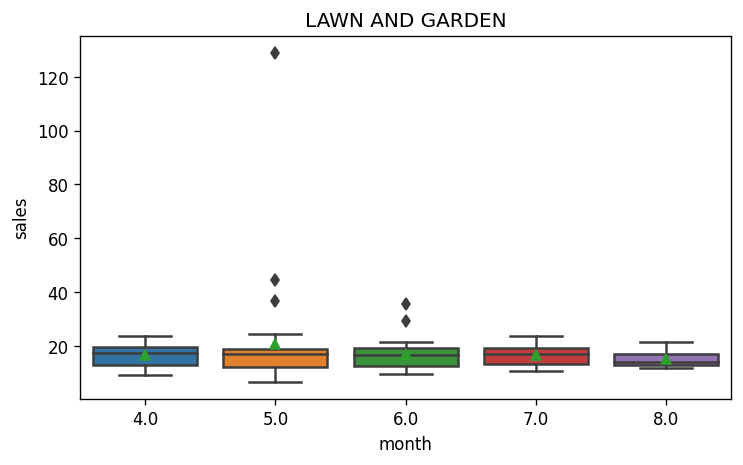

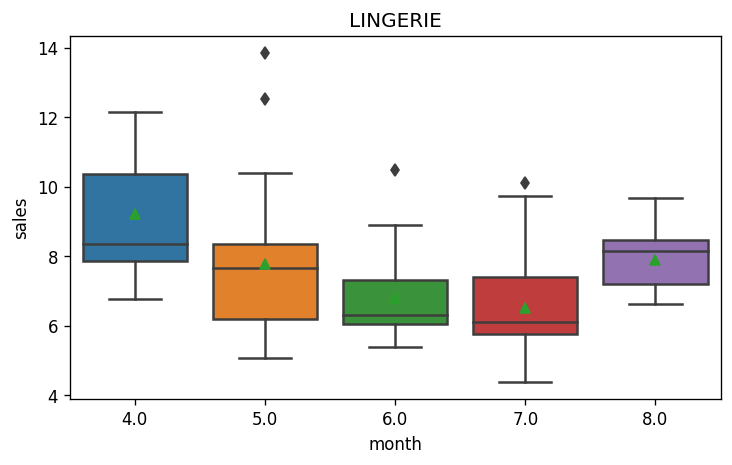

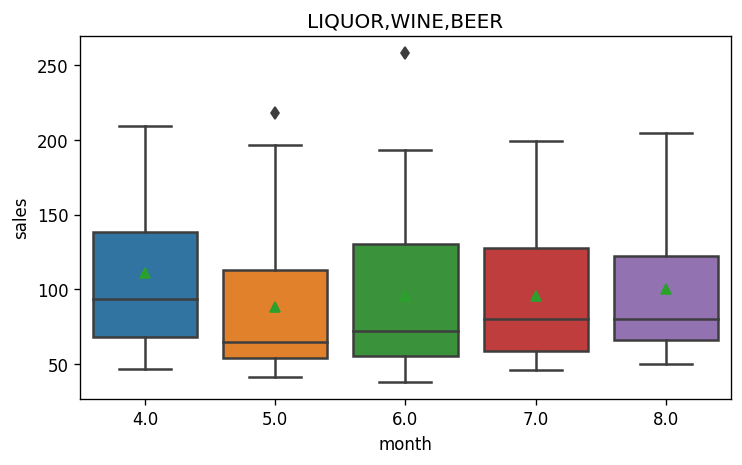

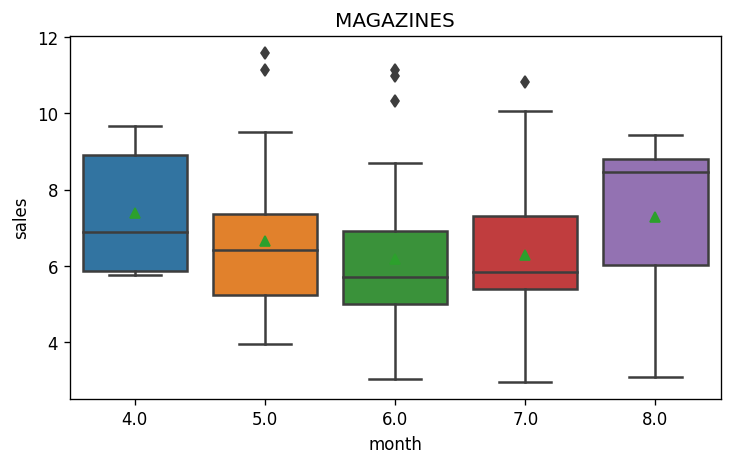

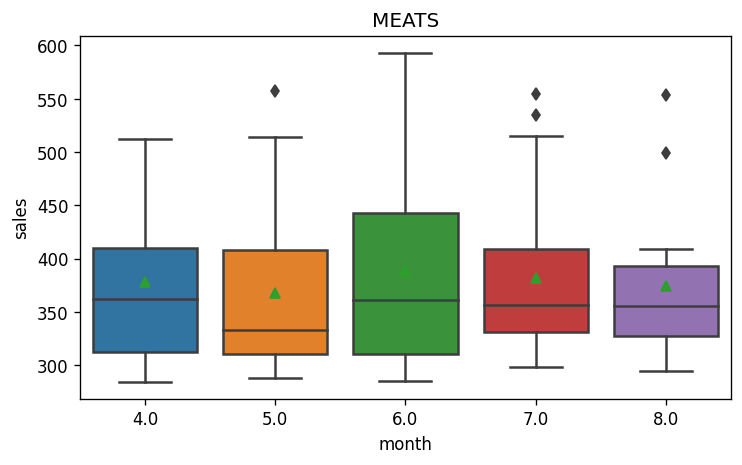

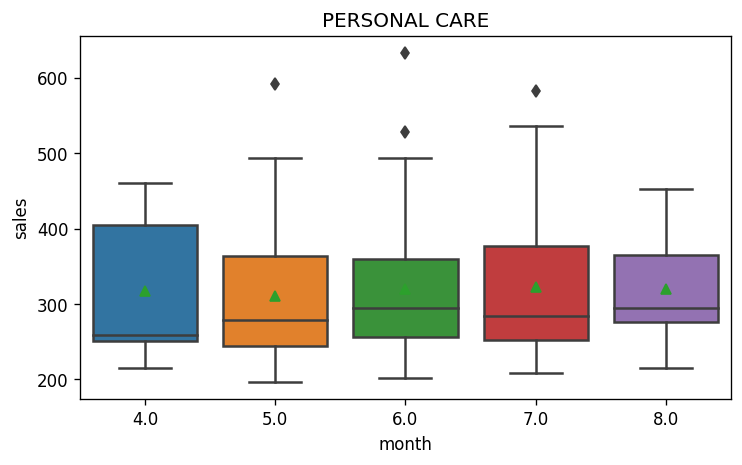

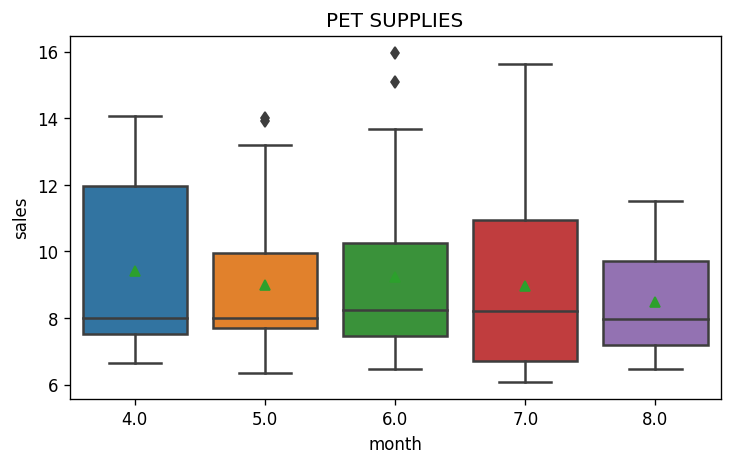

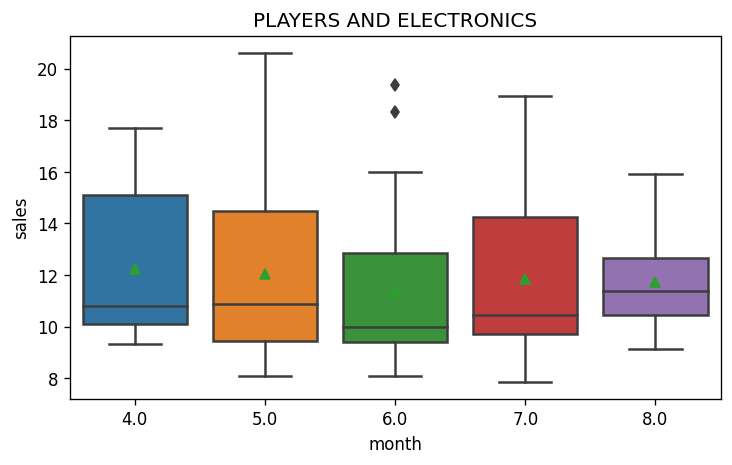

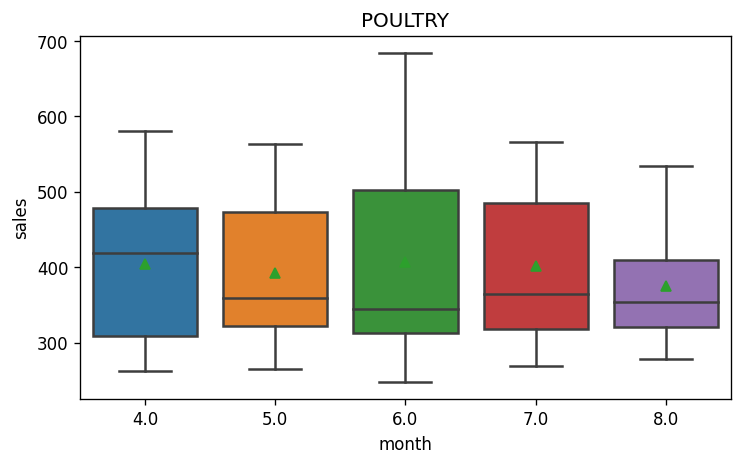

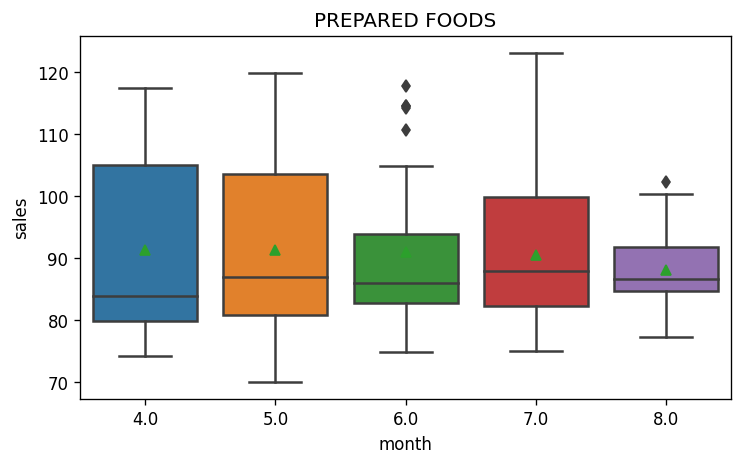

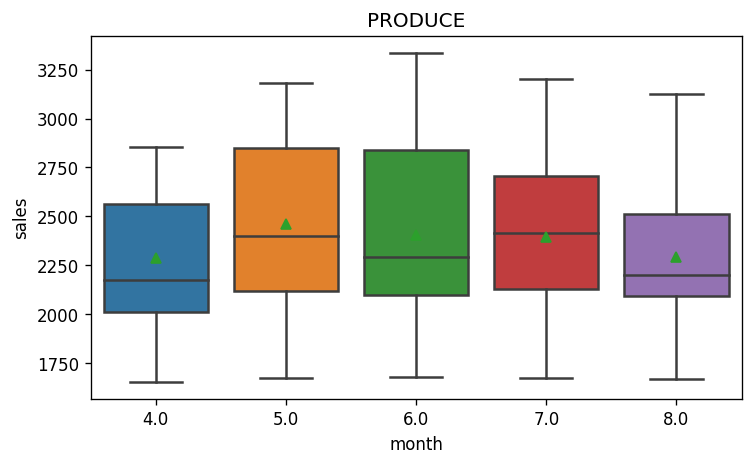

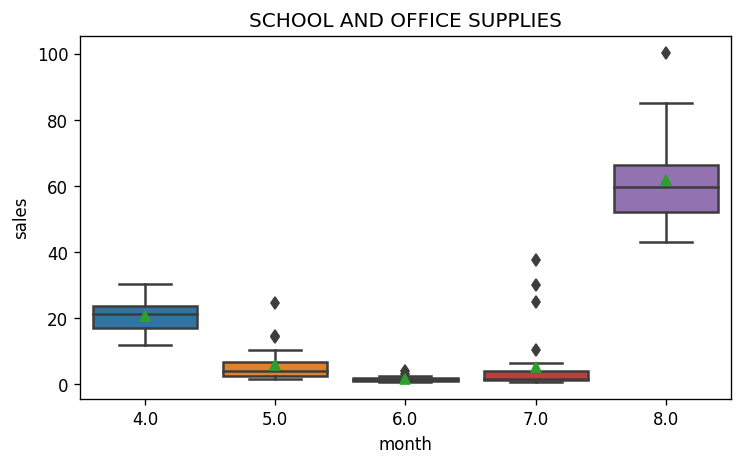

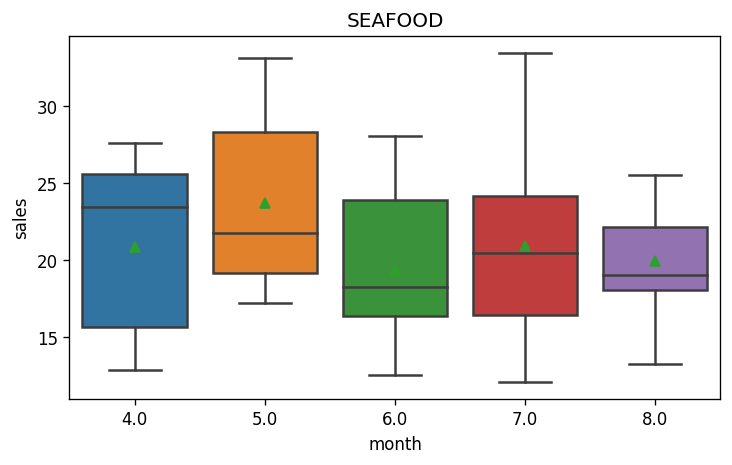

In [6]:
for family in df_train["family"].unique():
  data = df_train.loc["2017-04-20":].query(" family==@family ")
  data["month"] = data.index.month
  data = data.groupby(["date"]).mean()
  plt.figure(figsize=(7, 4), dpi=120)
  sns.boxplot(data=data, x="month", y="sales", showmeans=True).set(title=family)
  plt.show()

各製品のQ-Qプロットなどを表示
- ざっくり正規分布じゃなさそう&単位根ぽいのやつ
  - 

********** AUTOMOTIVE ***********
ADF statistic：-3.244001320762121
P-value：0.01757486782323706
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.889
尖度-0.515


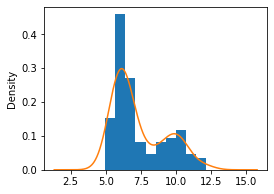

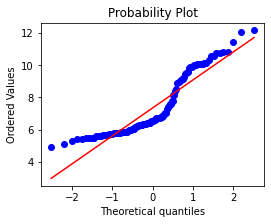

********** BABY CARE ***********
ADF statistic：-9.404436583770645
P-value：6.064666030849069e-16
Critival Value：{'1%': -3.487517288664615, '5%': -2.8865777180380032, '10%': -2.5801239192052012}
歪度0.692
尖度0.818


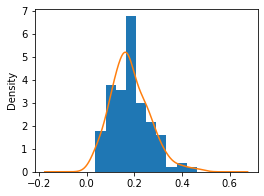

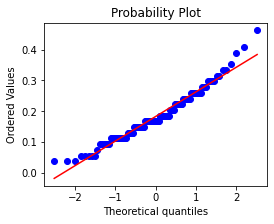

********** BEAUTY ***********
ADF statistic：-1.3720603362837545
P-value：0.5955950536393425
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度1.141
尖度1.128


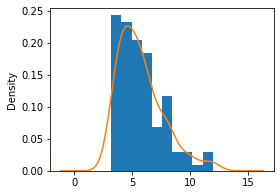

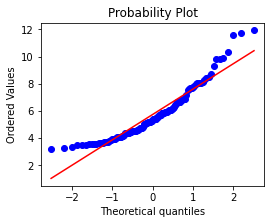

********** BEVERAGES ***********
ADF statistic：-2.3046101702001636
P-value：0.1704854107694781
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.989
尖度0.209


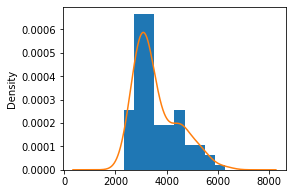

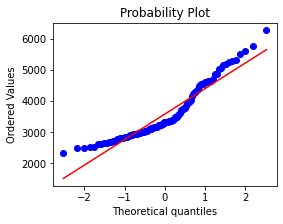

********** BOOKS ***********
ADF statistic：-2.3198496560612107
P-value：0.16564595502575497
Critival Value：{'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}
歪度1.35
尖度1.648


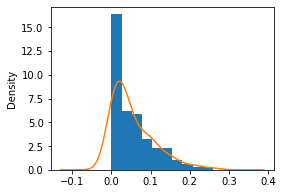

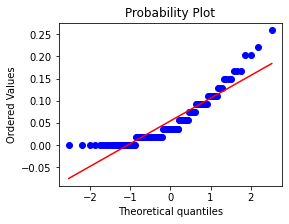

********** BREAD/BAKERY ***********
ADF statistic：-1.9734774255271559
P-value：0.2983220123795133
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度1.149
尖度0.802


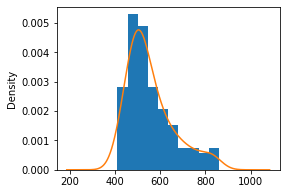

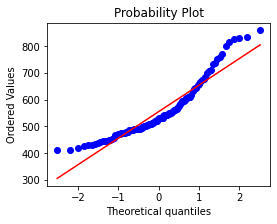

********** CELEBRATION ***********
ADF statistic：-1.7981211084260387
P-value：0.38139490932382814
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.733
尖度-0.487


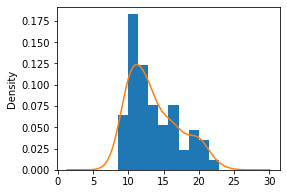

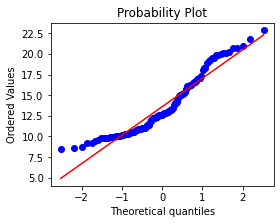

********** CLEANING ***********
ADF statistic：-2.6439896131487473
P-value：0.08424198690247714
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.912
尖度0.171


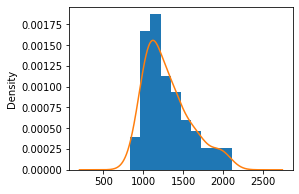

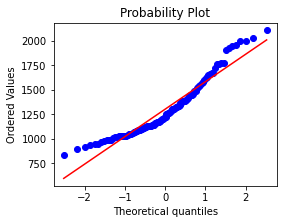

********** DAIRY ***********
ADF statistic：-1.254093695484226
P-value：0.6499042911082692
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度1.089
尖度0.759


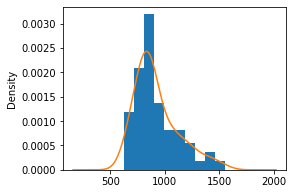

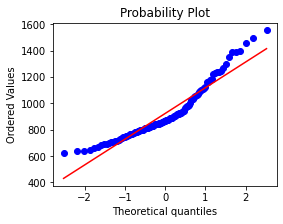

********** DELI ***********
ADF statistic：-2.225406050062973
P-value：0.19715406669930335
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.699
尖度-0.059


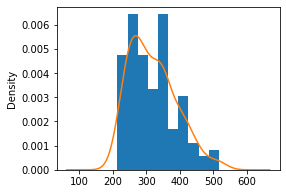

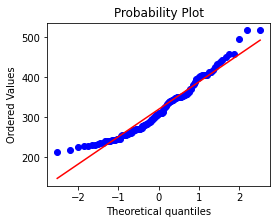

********** EGGS ***********
ADF statistic：-2.122967614220245
P-value：0.2353800504671063
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.674
尖度-0.438


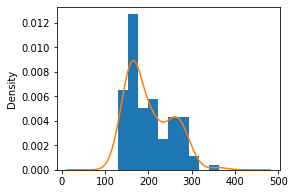

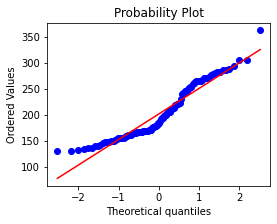

********** FROZEN FOODS ***********
ADF statistic：-1.180748845327898
P-value：0.6818217699830392
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.922
尖度-0.129


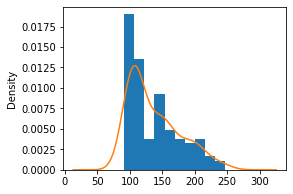

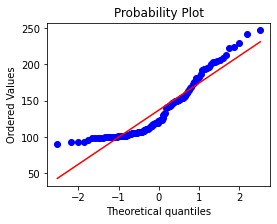

********** GROCERY I ***********
ADF statistic：-2.194544542440534
P-value：0.20823142831804786
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度1.058
尖度0.699


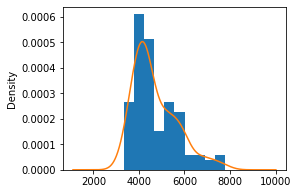

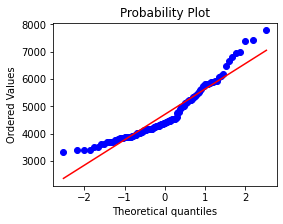

********** GROCERY II ***********
ADF statistic：-2.2398208949423117
P-value：0.19211139153739637
Critival Value：{'1%': -3.490683082754047, '5%': -2.8879516565798817, '10%': -2.5808574442009578}
歪度1.024
尖度1.035


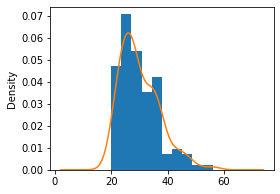

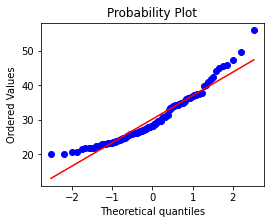

********** HARDWARE ***********
ADF statistic：-3.3463661716673245
P-value：0.012928915749714342
Critival Value：{'1%': -3.490683082754047, '5%': -2.8879516565798817, '10%': -2.5808574442009578}
歪度0.795
尖度0.262


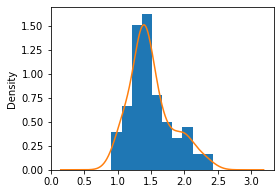

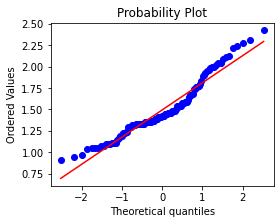

********** HOME AND KITCHEN I ***********
ADF statistic：-1.9442933873774884
P-value：0.31151937870393787
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度2.726
尖度14.742


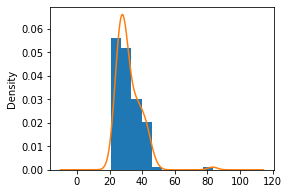

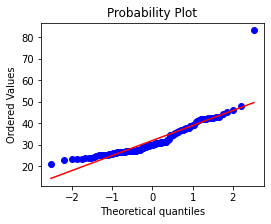

********** HOME AND KITCHEN II ***********
ADF statistic：-2.2552385582692054
P-value：0.18681086181861878
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.802
尖度-0.164


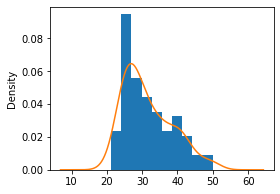

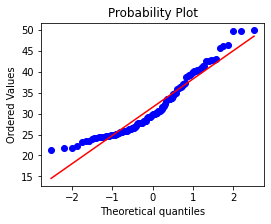

********** HOME APPLIANCES ***********
ADF statistic：0.4545281155460705
P-value：0.9834234817079838
Critival Value：{'1%': -3.490683082754047, '5%': -2.8879516565798817, '10%': -2.5808574442009578}
歪度0.354
尖度-0.15


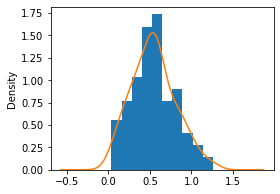

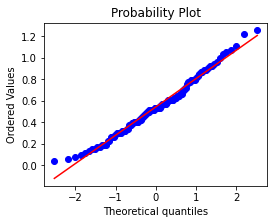

********** HOME CARE ***********
ADF statistic：-1.8265328105597172
P-value：0.36737070705049707
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度1.079
尖度0.58


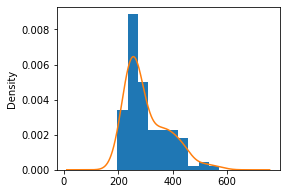

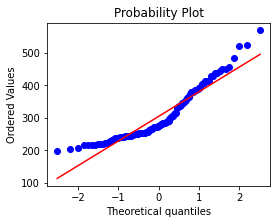

********** LADIESWEAR ***********
ADF statistic：-0.42954789713223096
P-value：0.9050472168932616
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度1.202
尖度0.244


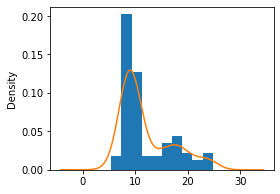

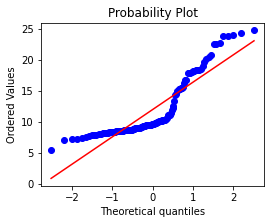

********** LAWN AND GARDEN ***********
ADF statistic：-7.626977809606946
P-value：2.0563098491684198e-11
Critival Value：{'1%': -3.4880216384691867, '5%': -2.8867966864160075, '10%': -2.5802408234244947}
歪度7.826
尖度73.619


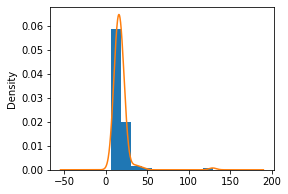

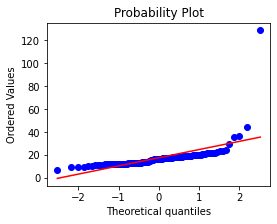

********** LINGERIE ***********
ADF statistic：-2.8334361013268894
P-value：0.05365410273975333
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度1.167
尖度1.896


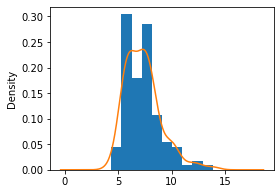

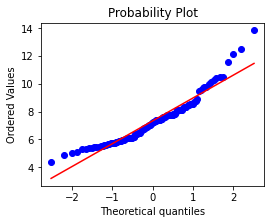

********** LIQUOR,WINE,BEER ***********
ADF statistic：-2.225712054037871
P-value：0.197046147779451
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度1.071
尖度0.209


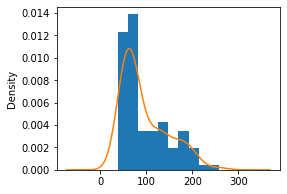

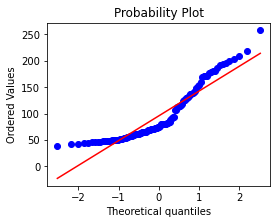

********** MAGAZINES ***********
ADF statistic：-1.9132377096152597
P-value：0.32585952882667746
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.505
尖度-0.269


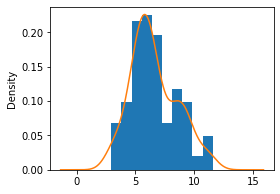

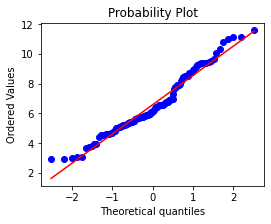

********** MEATS ***********
ADF statistic：-2.2091574202799986
P-value：0.20293864583335558
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度1.004
尖度0.007


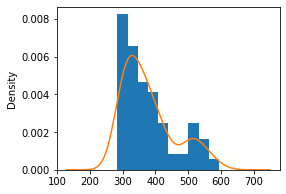

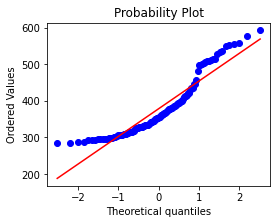

********** PERSONAL CARE ***********
ADF statistic：-2.553201147600128
P-value：0.10306043937914006
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度1.146
尖度1.028


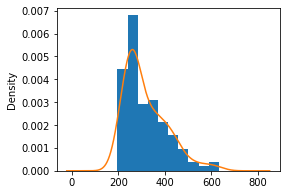

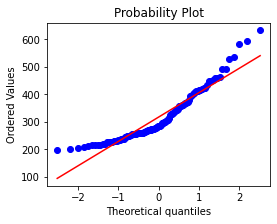

********** PET SUPPLIES ***********
ADF statistic：-1.6910304687631912
P-value：0.4357396737970034
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度1.139
尖度0.322


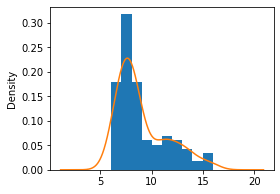

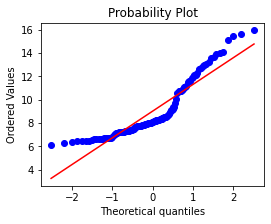

********** PLAYERS AND ELECTRONICS ***********
ADF statistic：-3.100533326970032
P-value：0.02651374506817488
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度1.031
尖度0.088


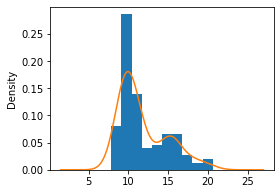

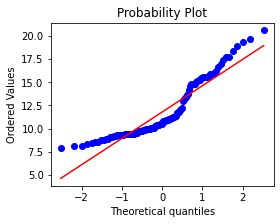

********** POULTRY ***********
ADF statistic：-1.828448091823062
P-value：0.3664322457248501
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.622
尖度-0.619


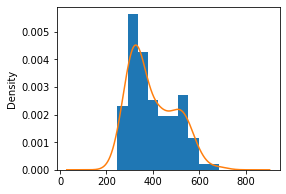

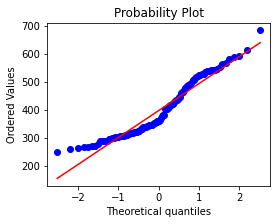

********** PREPARED FOODS ***********
ADF statistic：-2.3844073044293292
P-value：0.1461857805794584
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.895
尖度-0.107


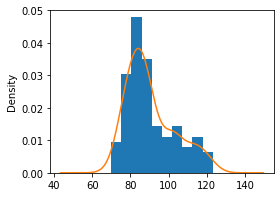

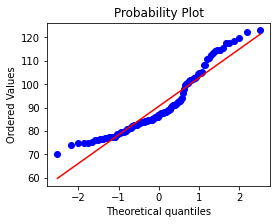

********** PRODUCE ***********
ADF statistic：-1.0226613399650715
P-value：0.7449096349931661
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.205
尖度-0.834


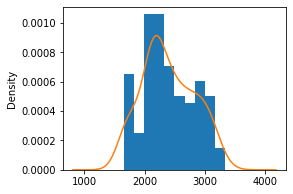

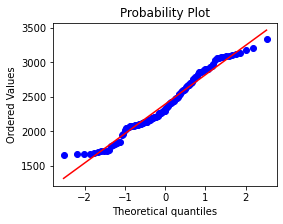

********** SCHOOL AND OFFICE SUPPLIES ***********
ADF statistic：0.9210215406108486
P-value：0.9933586213317196
Critival Value：{'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}
歪度2.125
尖度3.948


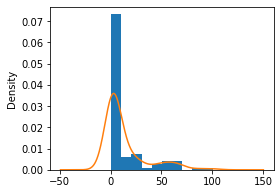

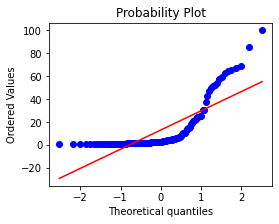

********** SEAFOOD ***********
ADF statistic：-1.5334623778894165
P-value：0.5168978518356785
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.47
尖度-0.406


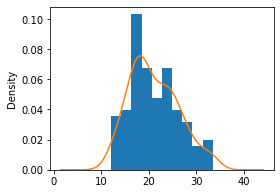

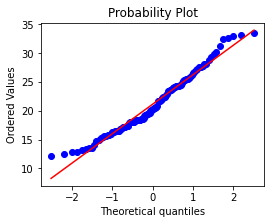

In [8]:
unit_root = [] # 単位根リスト
p_value = 0.05

for family in df_train["family"].unique():
  print(f"********** {family} ***********")
  target_values = df_train.loc["2017-04-20":].query(" family==@family ").groupby(["date"]).mean().sales

  adf_rt = tsa.adfuller(target_values.to_numpy())
  print(f"ADF statistic：{adf_rt[0]}")
  print(f"P-value：{adf_rt[1]}")
  print(f"Critival Value：{adf_rt[4]}")
  if adf_rt[1] > p_value:
    unit_root.append(family)

  skew = target_values.skew() # 歪度
  kurt = target_values.kurt() # 尖度
  print(f"歪度{round(skew, 3)}")
  print(f"尖度{round(kurt, 3)}")

  # カーネル密度推定
  fig = plt.figure(figsize=(4, 3))
  ax = fig.add_subplot(111)
  target_values.hist(density=True, ax=ax)
  target_values.plot.kde(ax=ax)
  plt.show()

  # Q-Qプロット
  fig = plt.figure(figsize=(4, 3))
  ax = fig.add_subplot(111)
  st.probplot(target_values, plot=ax)
  plt.show()

In [9]:
# 単位根
unit_root

['BEAUTY',
 'BEVERAGES',
 'BOOKS',
 'BREAD/BAKERY',
 'CELEBRATION',
 'CLEANING',
 'DAIRY',
 'DELI',
 'EGGS',
 'FROZEN FOODS',
 'GROCERY I',
 'GROCERY II',
 'HOME AND KITCHEN I',
 'HOME AND KITCHEN II',
 'HOME APPLIANCES',
 'HOME CARE',
 'LADIESWEAR',
 'LINGERIE',
 'LIQUOR,WINE,BEER',
 'MAGAZINES',
 'MEATS',
 'PERSONAL CARE',
 'PET SUPPLIES',
 'POULTRY',
 'PREPARED FOODS',
 'PRODUCE',
 'SCHOOL AND OFFICE SUPPLIES',
 'SEAFOOD']

********** AUTOMOTIVE ***********
ADF statistic：-3.01074857561299
P-value：0.033902738150036985
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.685
尖度-0.883


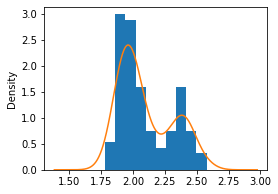

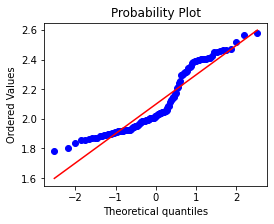

********** BEAUTY ***********
ADF statistic：-1.159107276855638
P-value：0.6909348746523764
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.536
尖度-0.307


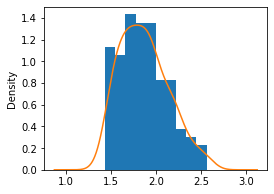

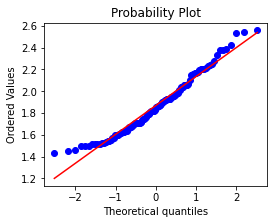

********** BEVERAGES ***********
ADF statistic：-2.2607485391576962
P-value：0.18493989740036787
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.615
尖度-0.509


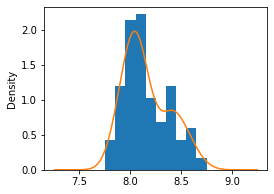

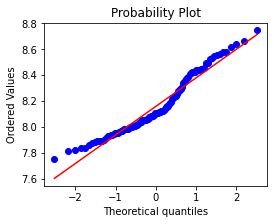

********** BOOKS ***********
ADF statistic：-2.2519908448711203
P-value：0.18791941359582853
Critival Value：{'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}
歪度1.223
尖度1.156


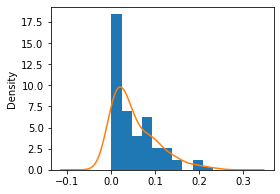

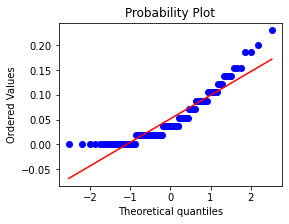

********** DELI ***********
ADF statistic：-2.204379764411835
P-value：0.20465969711173998
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.302
尖度-0.717


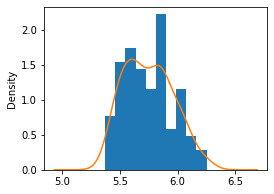

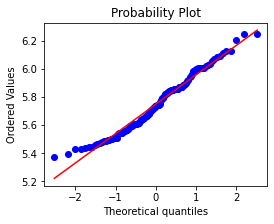

********** EGGS ***********
ADF statistic：-2.1698879734036853
P-value：0.2173552982567742
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.328
尖度-0.981


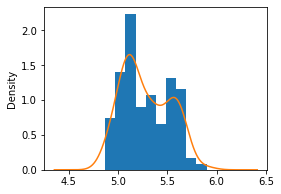

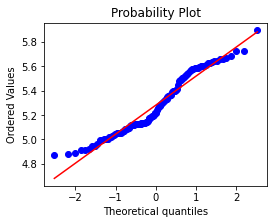

********** FROZEN FOODS ***********
ADF statistic：-1.3675515640399658
P-value：0.5977297022559616
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.576
尖度-0.866


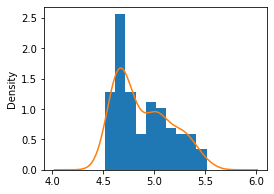

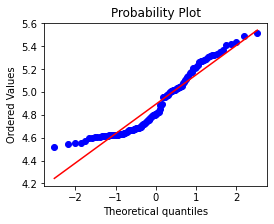

********** HOME AND KITCHEN II ***********
ADF statistic：-2.2674045273936714
P-value：0.1826962056228813
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.469
尖度-0.708


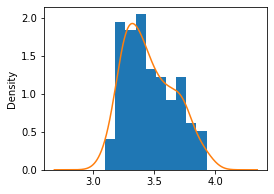

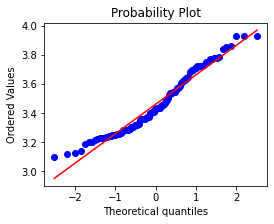

********** LADIESWEAR ***********
ADF statistic：-0.6506575761412441
P-value：0.8591198659669077
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.839
尖度-0.528


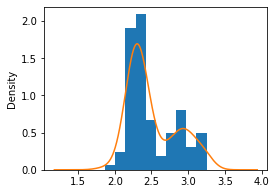

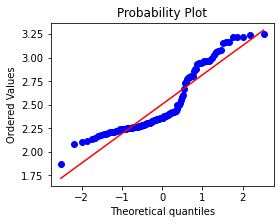

********** LIQUOR,WINE,BEER ***********
ADF statistic：-2.1289923510176485
P-value：0.23301753582441503
Critival Value：{'1%': -3.4942202045135513, '5%': -2.889485291005291, '10%': -2.5816762131519275}
歪度0.462
尖度-0.952


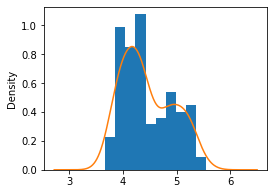

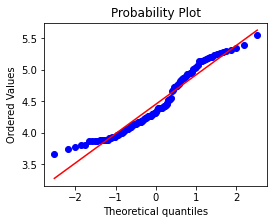

********** MEATS ***********
ADF statistic：-2.2763998683290763
P-value：0.17969247916150727
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.721
尖度-0.503


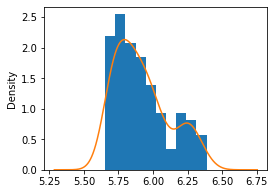

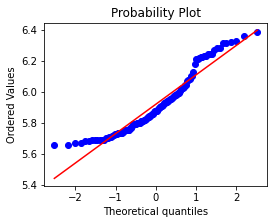

********** PERSONAL CARE ***********
ADF statistic：-2.364715500988959
P-value：0.15194378824821864
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.596
尖度-0.376


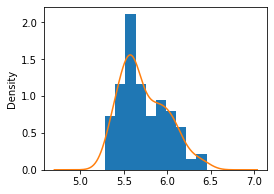

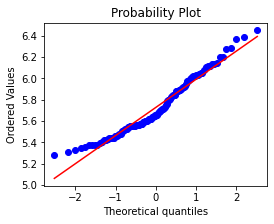

********** PET SUPPLIES ***********
ADF statistic：-1.8089909292782054
P-value：0.3760071715267761
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.825
尖度-0.387


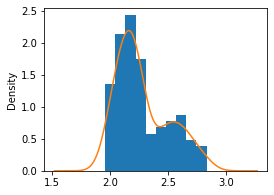

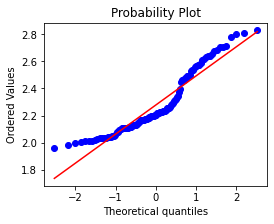

********** PLAYERS AND ELECTRONICS ***********
ADF statistic：-3.062191474848222
P-value：0.029480682737083107
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.73
尖度-0.568


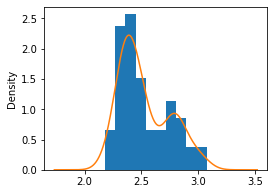

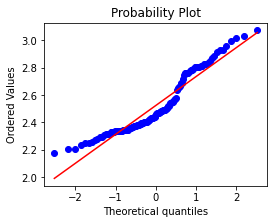

********** POULTRY ***********
ADF statistic：-1.927556473865569
P-value：0.3192107610569296
Critival Value：{'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}
歪度0.297
尖度-1.024


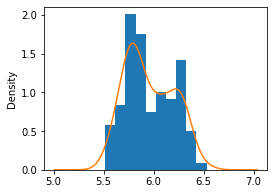

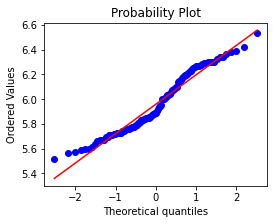

********** SCHOOL AND OFFICE SUPPLIES ***********
ADF statistic：-2.119844287618097
P-value：0.23661034007308157
Critival Value：{'1%': -3.49181775886872, '5%': -2.8884437992971588, '10%': -2.5811201893779985}
歪度0.879
尖度-0.577


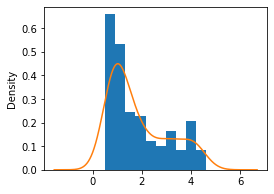

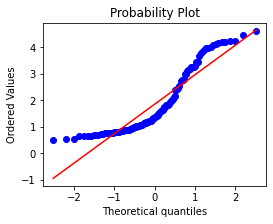

['BEAUTY',
 'BEVERAGES',
 'BOOKS',
 'DELI',
 'EGGS',
 'FROZEN FOODS',
 'HOME AND KITCHEN II',
 'LADIESWEAR',
 'LIQUOR,WINE,BEER',
 'MEATS',
 'PERSONAL CARE',
 'PET SUPPLIES',
 'POULTRY',
 'SCHOOL AND OFFICE SUPPLIES']

In [11]:
unit_root = [] # 単位根リスト
a = ["AUTOMOTIVE",
     "BEAUTY",
     "BEVERAGES",
     "BOOKS",
     "DELI",
     "EGGS",
     "FROZEN FOODS",
     "HOME AND KITCHEN II",
     "LADIESWEAR",
     "LIQUOR,WINE,BEER",
     "MEATS",
     "PERSONAL CARE",
     "PET SUPPLIES",
     "PLAYERS AND ELECTRONICS",
     "POULTRY",
     "SCHOOL AND OFFICE SUPPLIES"
     ]

for family in a:
  print(f"********** {family} ***********")
  target_values = df_train.loc["2017-04-20":].query(" family==@family ").groupby(["date"]).mean().sales
  target_values = np.log1p(target_values)

  adf_rt = tsa.adfuller(target_values.to_numpy())
  print(f"ADF statistic：{adf_rt[0]}")
  print(f"P-value：{adf_rt[1]}")
  print(f"Critival Value：{adf_rt[4]}")
  if adf_rt[1] > p_value:
    unit_root.append(family)

  skew = target_values.skew() # 歪度
  kurt = target_values.kurt() # 尖度
  print(f"歪度{round(skew, 3)}")
  print(f"尖度{round(kurt, 3)}")

  # カーネル密度推定
  fig = plt.figure(figsize=(4, 3))
  ax = fig.add_subplot(111)
  target_values.hist(density=True, ax=ax)
  target_values.plot.kde(ax=ax)
  plt.show()

  # Q-Qプロット
  fig = plt.figure(figsize=(4, 3))
  ax = fig.add_subplot(111)
  st.probplot(target_values, plot=ax)
  plt.show()

unit_root